#### 선형 모델 (Linear Models)

- 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
- 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행
- 회구 분석을 위한 선형 모델은 다음과 같이 정의

<div align="center">

$\hat{y}(w, x) = w_0 + w_1x_1 + \cdots + w_px_p$

</div>

- $x$ : 입력 데이터
- $w$ : 모델이 학습할 파라미터
- $w_0$ : 편향(bias)
- $w_1 ~ w_p$ : 가중치 (weight)

#### 선형 회귀 (Linear Regression)
    - 선형 회귀(Linear Regression)또는 최소제곱법(Ordinary Least Squares)은 가장 간단한 회귀 분석을 위한 선형 모델
    - 선형 회귀는 모델의 예측과 정답 사이의 평균 제곱 오차 (Mean Square Error)를 최소화 하는 학습 파라미터 w 를 찾음
    - 평균제곱오차는 아래와 같이 정의

<div align="center">

$\displaystyle MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

</div>

- $y$ : 정답
- $\hat{y}$ : 예측값

- 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
    - MAE(Mean Absolute Error)
    - MAPE(Mean Absolute Percentage Error)
    - MSE(Mean Squared Error)
    - MPE(mean Percentage Error)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

C:\Users\jjong\AppData\Local\Temp\ipykernel_23316\122571495.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

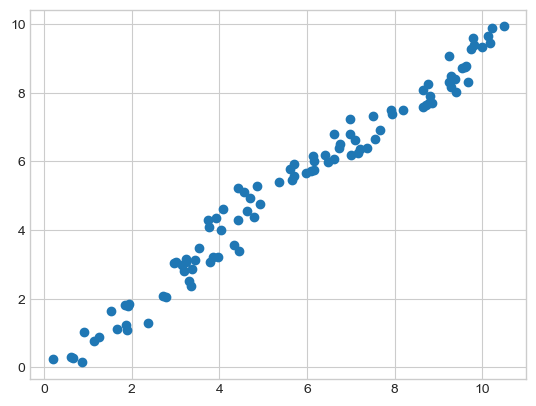

In [15]:
noise = np.random.rand(100,1)
X = sorted(10 * np.random.rand(100, 1)) + noise
y = sorted(10 * np.random.rand(100))

plt.scatter(X, y);

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
print(f'선형 회귀 가중치 : {model.coef_}')
print(f'선형 회귀 편향 : {model.intercept_}')

선형 회귀 가중치 : [0.93171652]
선형 회귀 편향 : 0.009192512885469739


In [18]:
print(f'학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test, y_test)}')

학습 데이터 점수 : 0.9745566918829422
평가 데이터 점수 : 0.9795755480173561


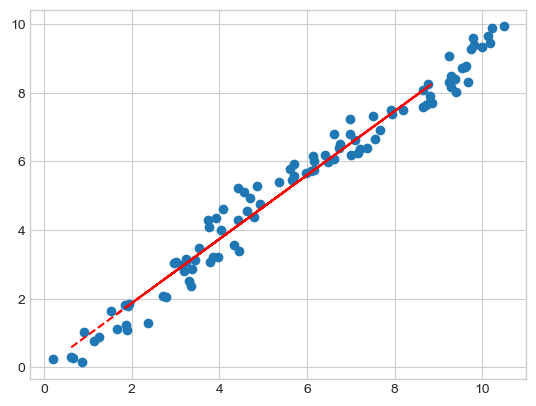

In [21]:
predicted = model.predict(X_test)

plt.scatter(X, y)
plt.plot(X_test, predicted, '--r');

##### 보스턴 주택 가격 데이터

In [55]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(url)
print(boston_df.head())

      crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [30]:
boston_df.describe()

crim          zn       indus  ...           b       lstat        medv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

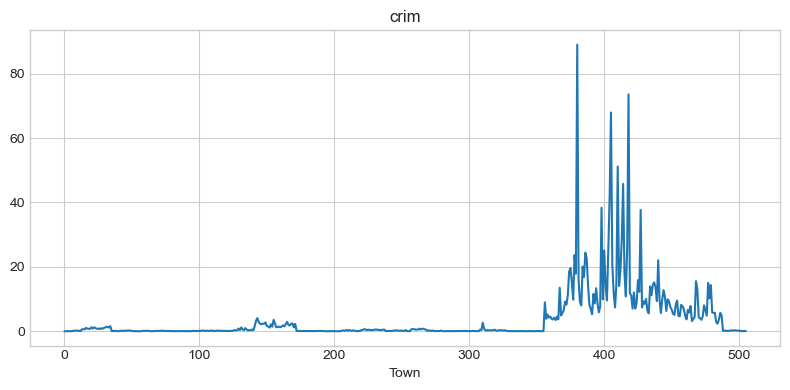

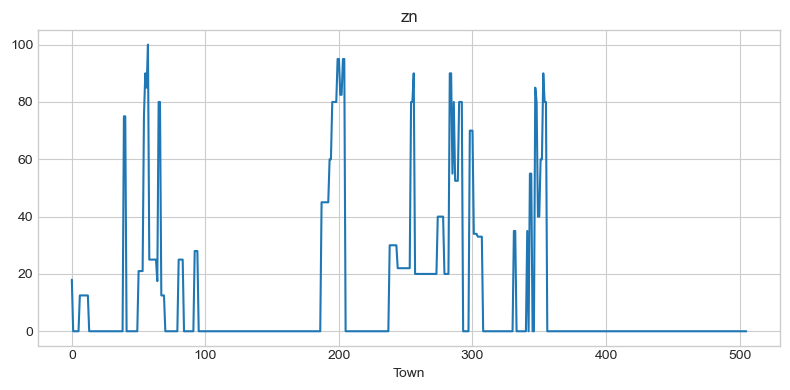

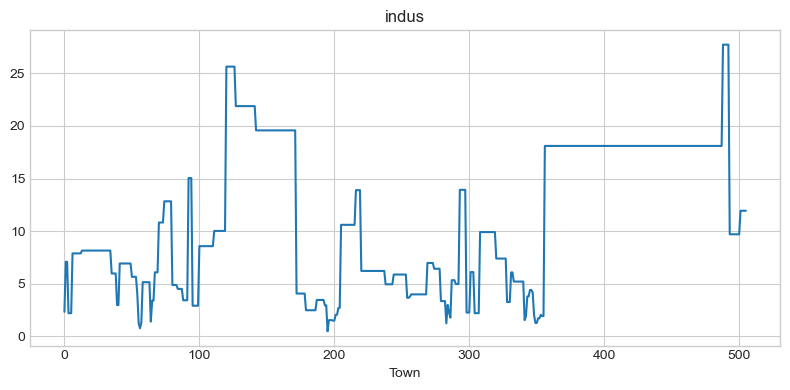

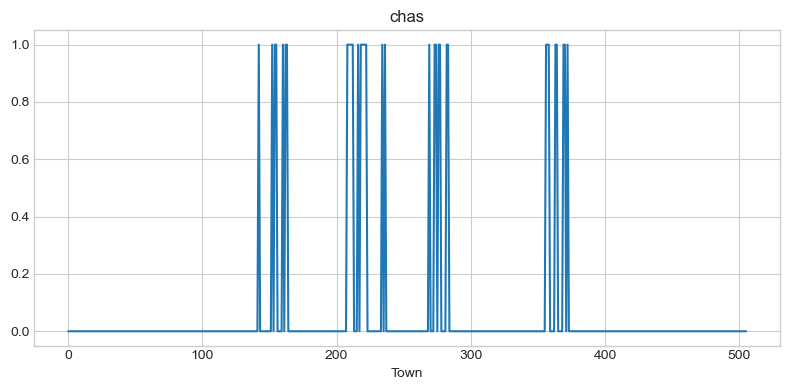

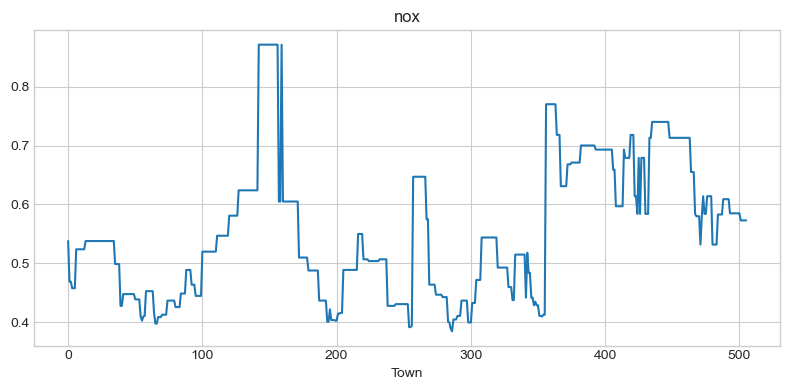

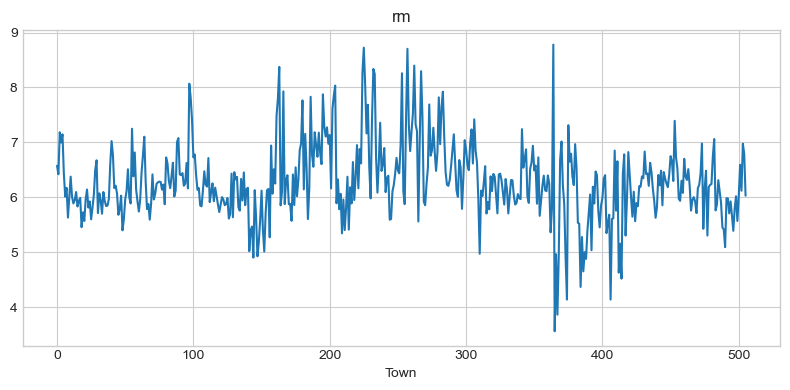

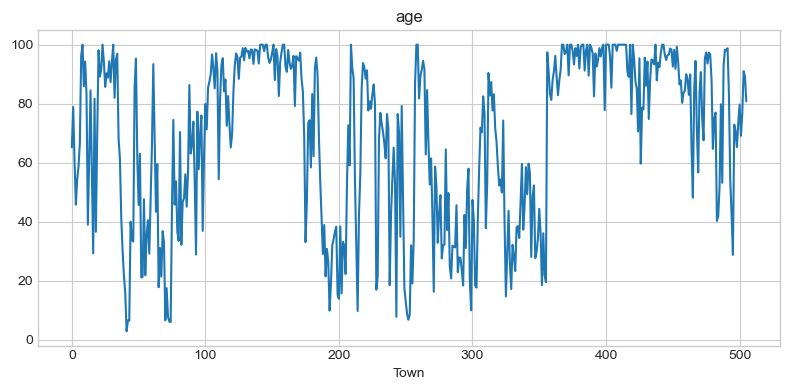

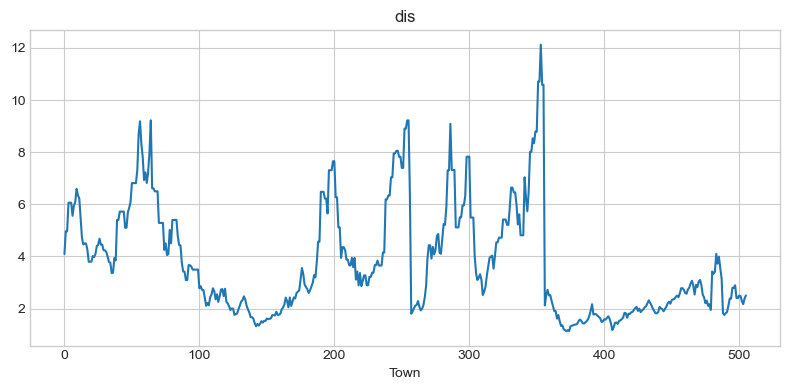

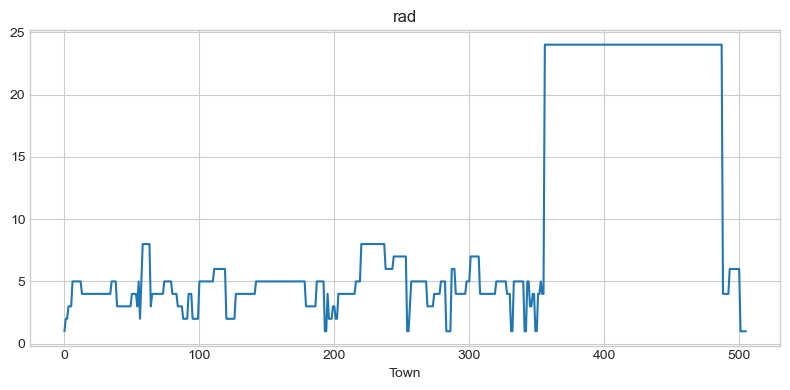

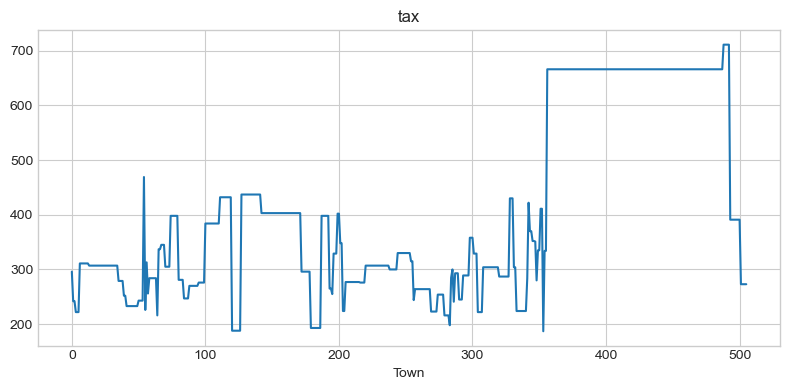

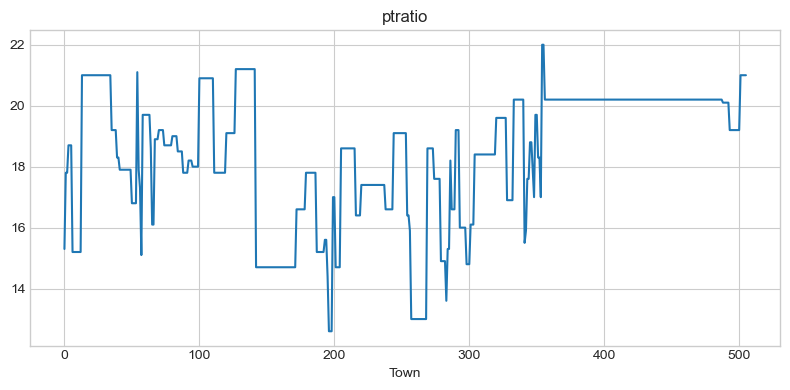

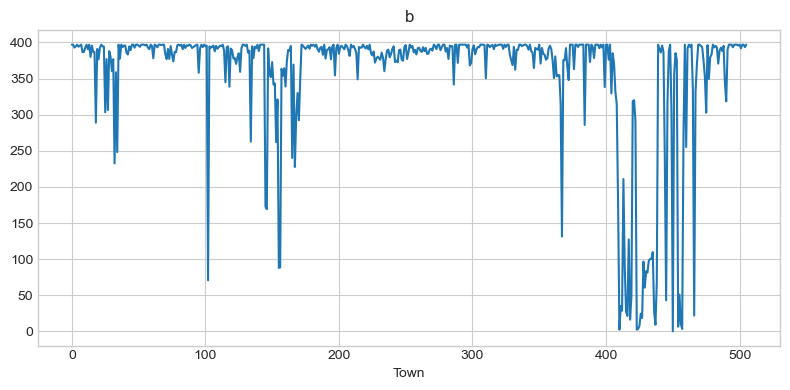

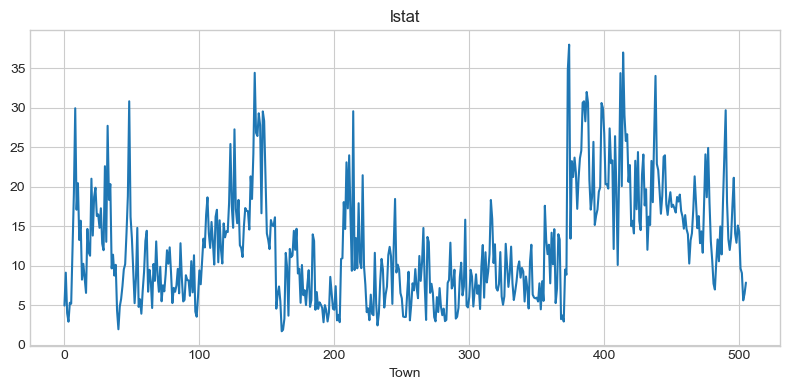

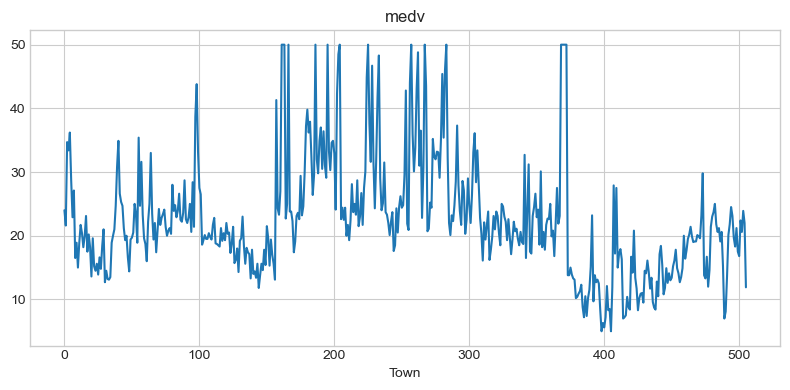

In [33]:
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.plot(boston_df[col])
    plt.title(col)
    plt.xlabel('Town')
    plt.tight_layout()

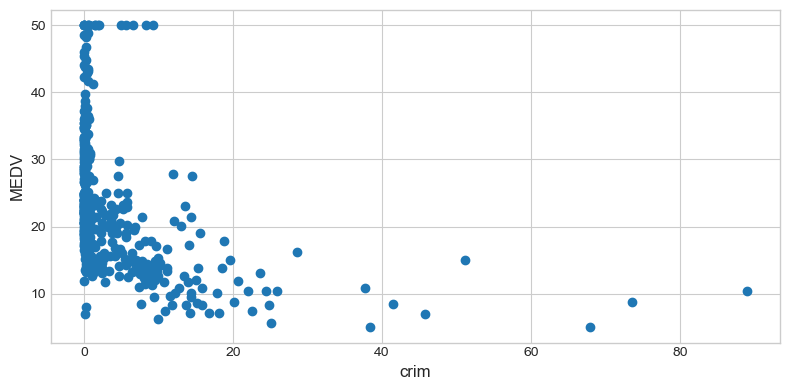

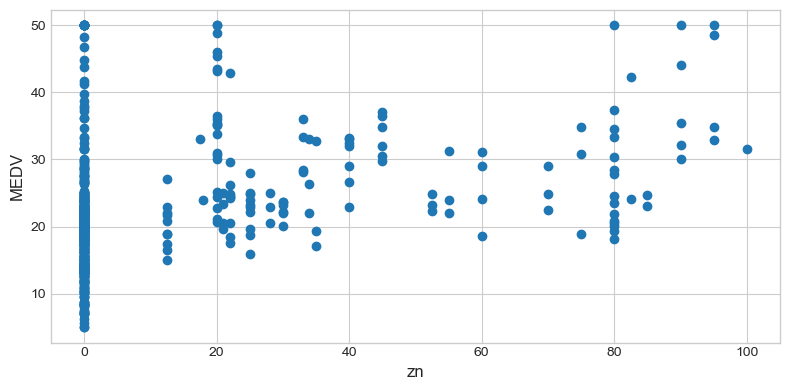

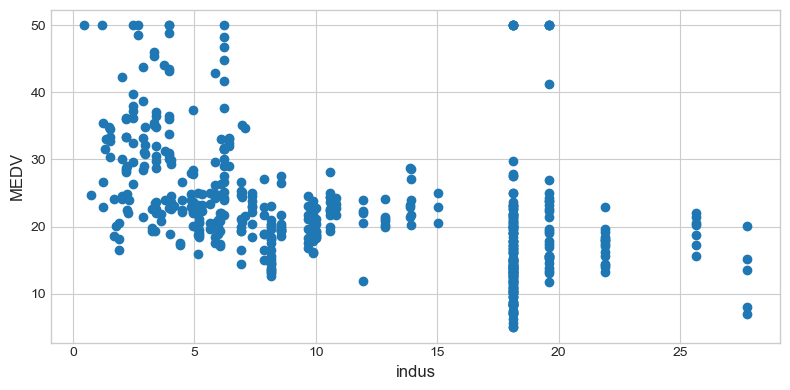

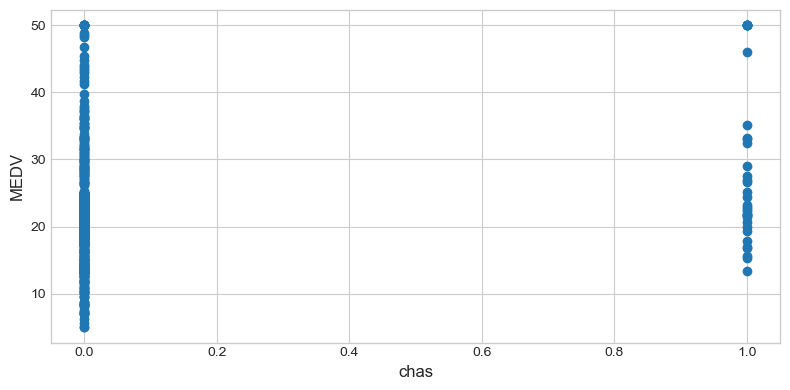

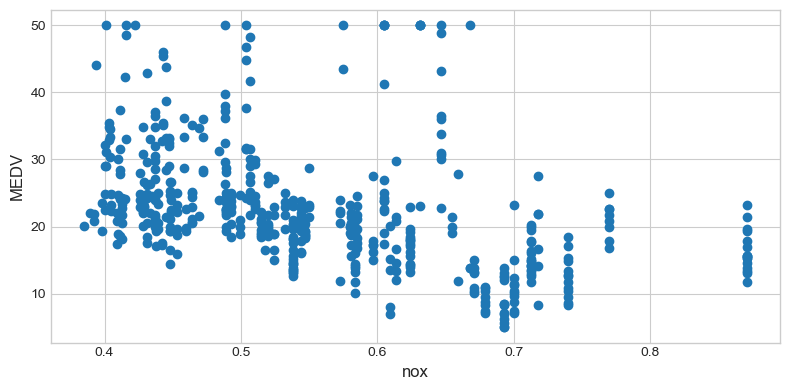

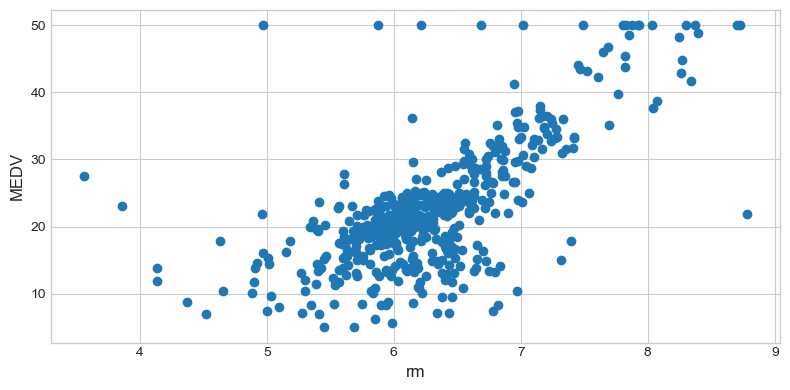

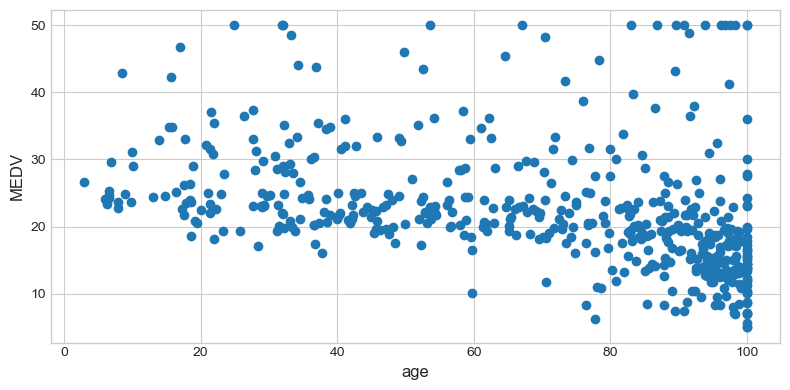

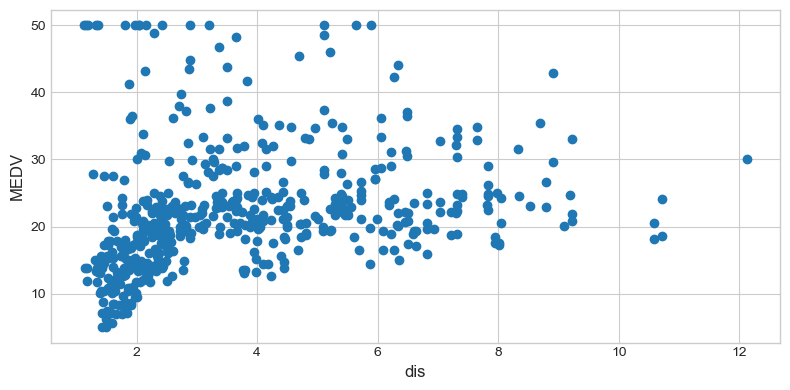

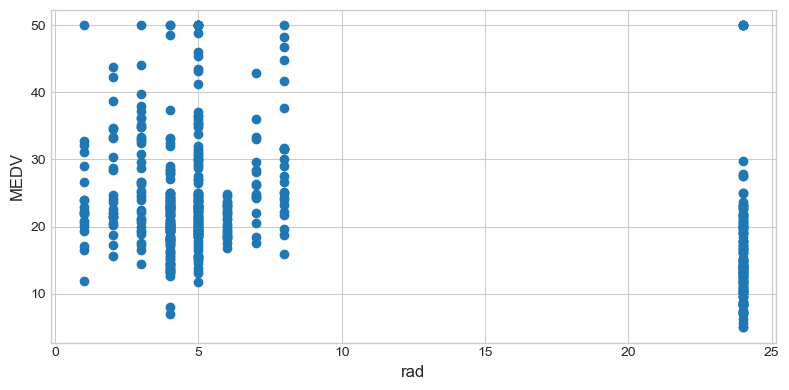

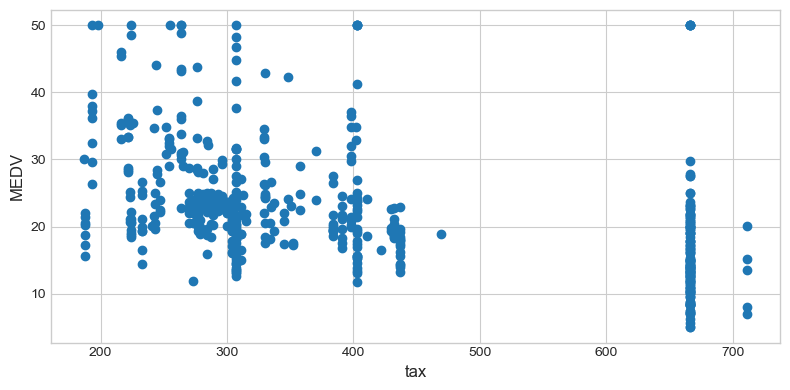

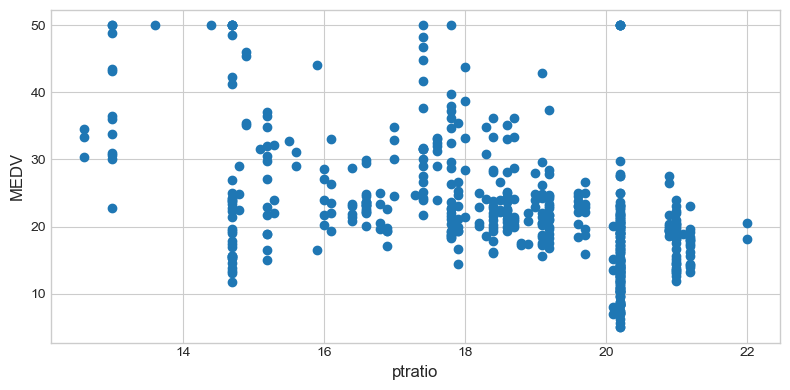

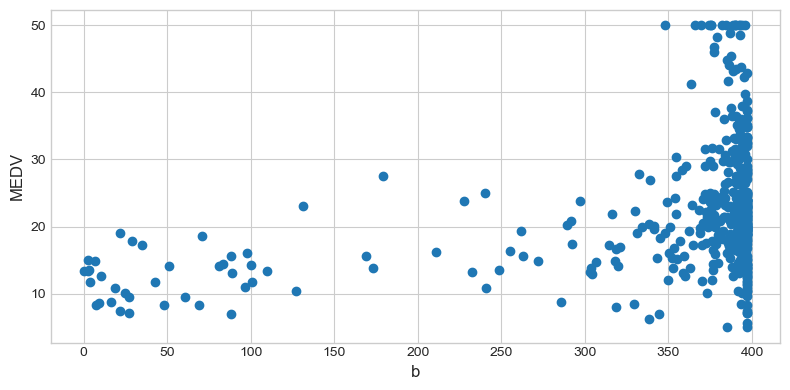

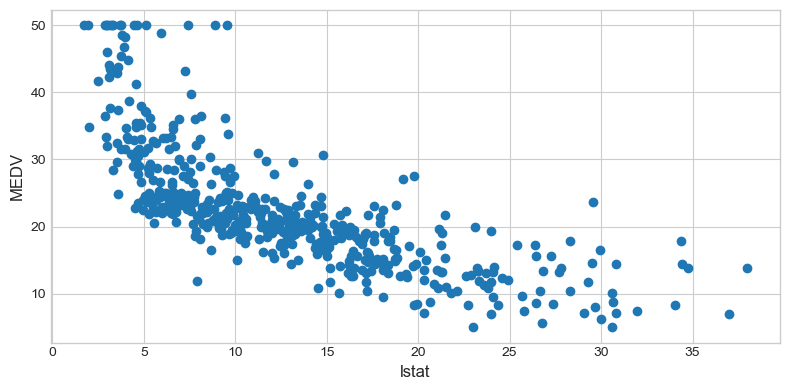

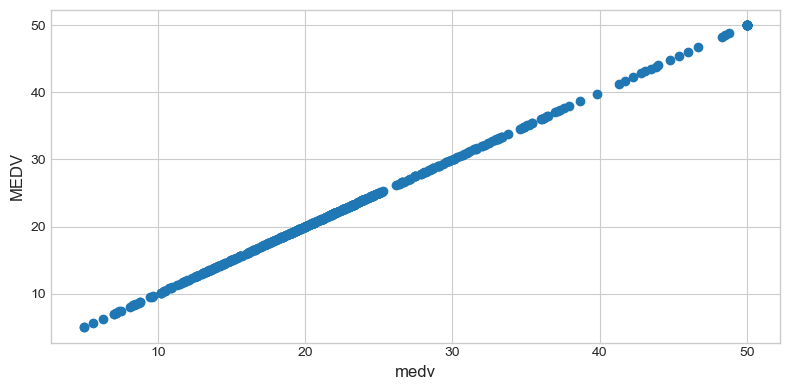

In [35]:
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.scatter(boston_df[col], boston_df['medv'])
    plt.ylabel('MEDV',size=12)
    plt.xlabel(col, size=12)
    plt.tight_layout()

c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


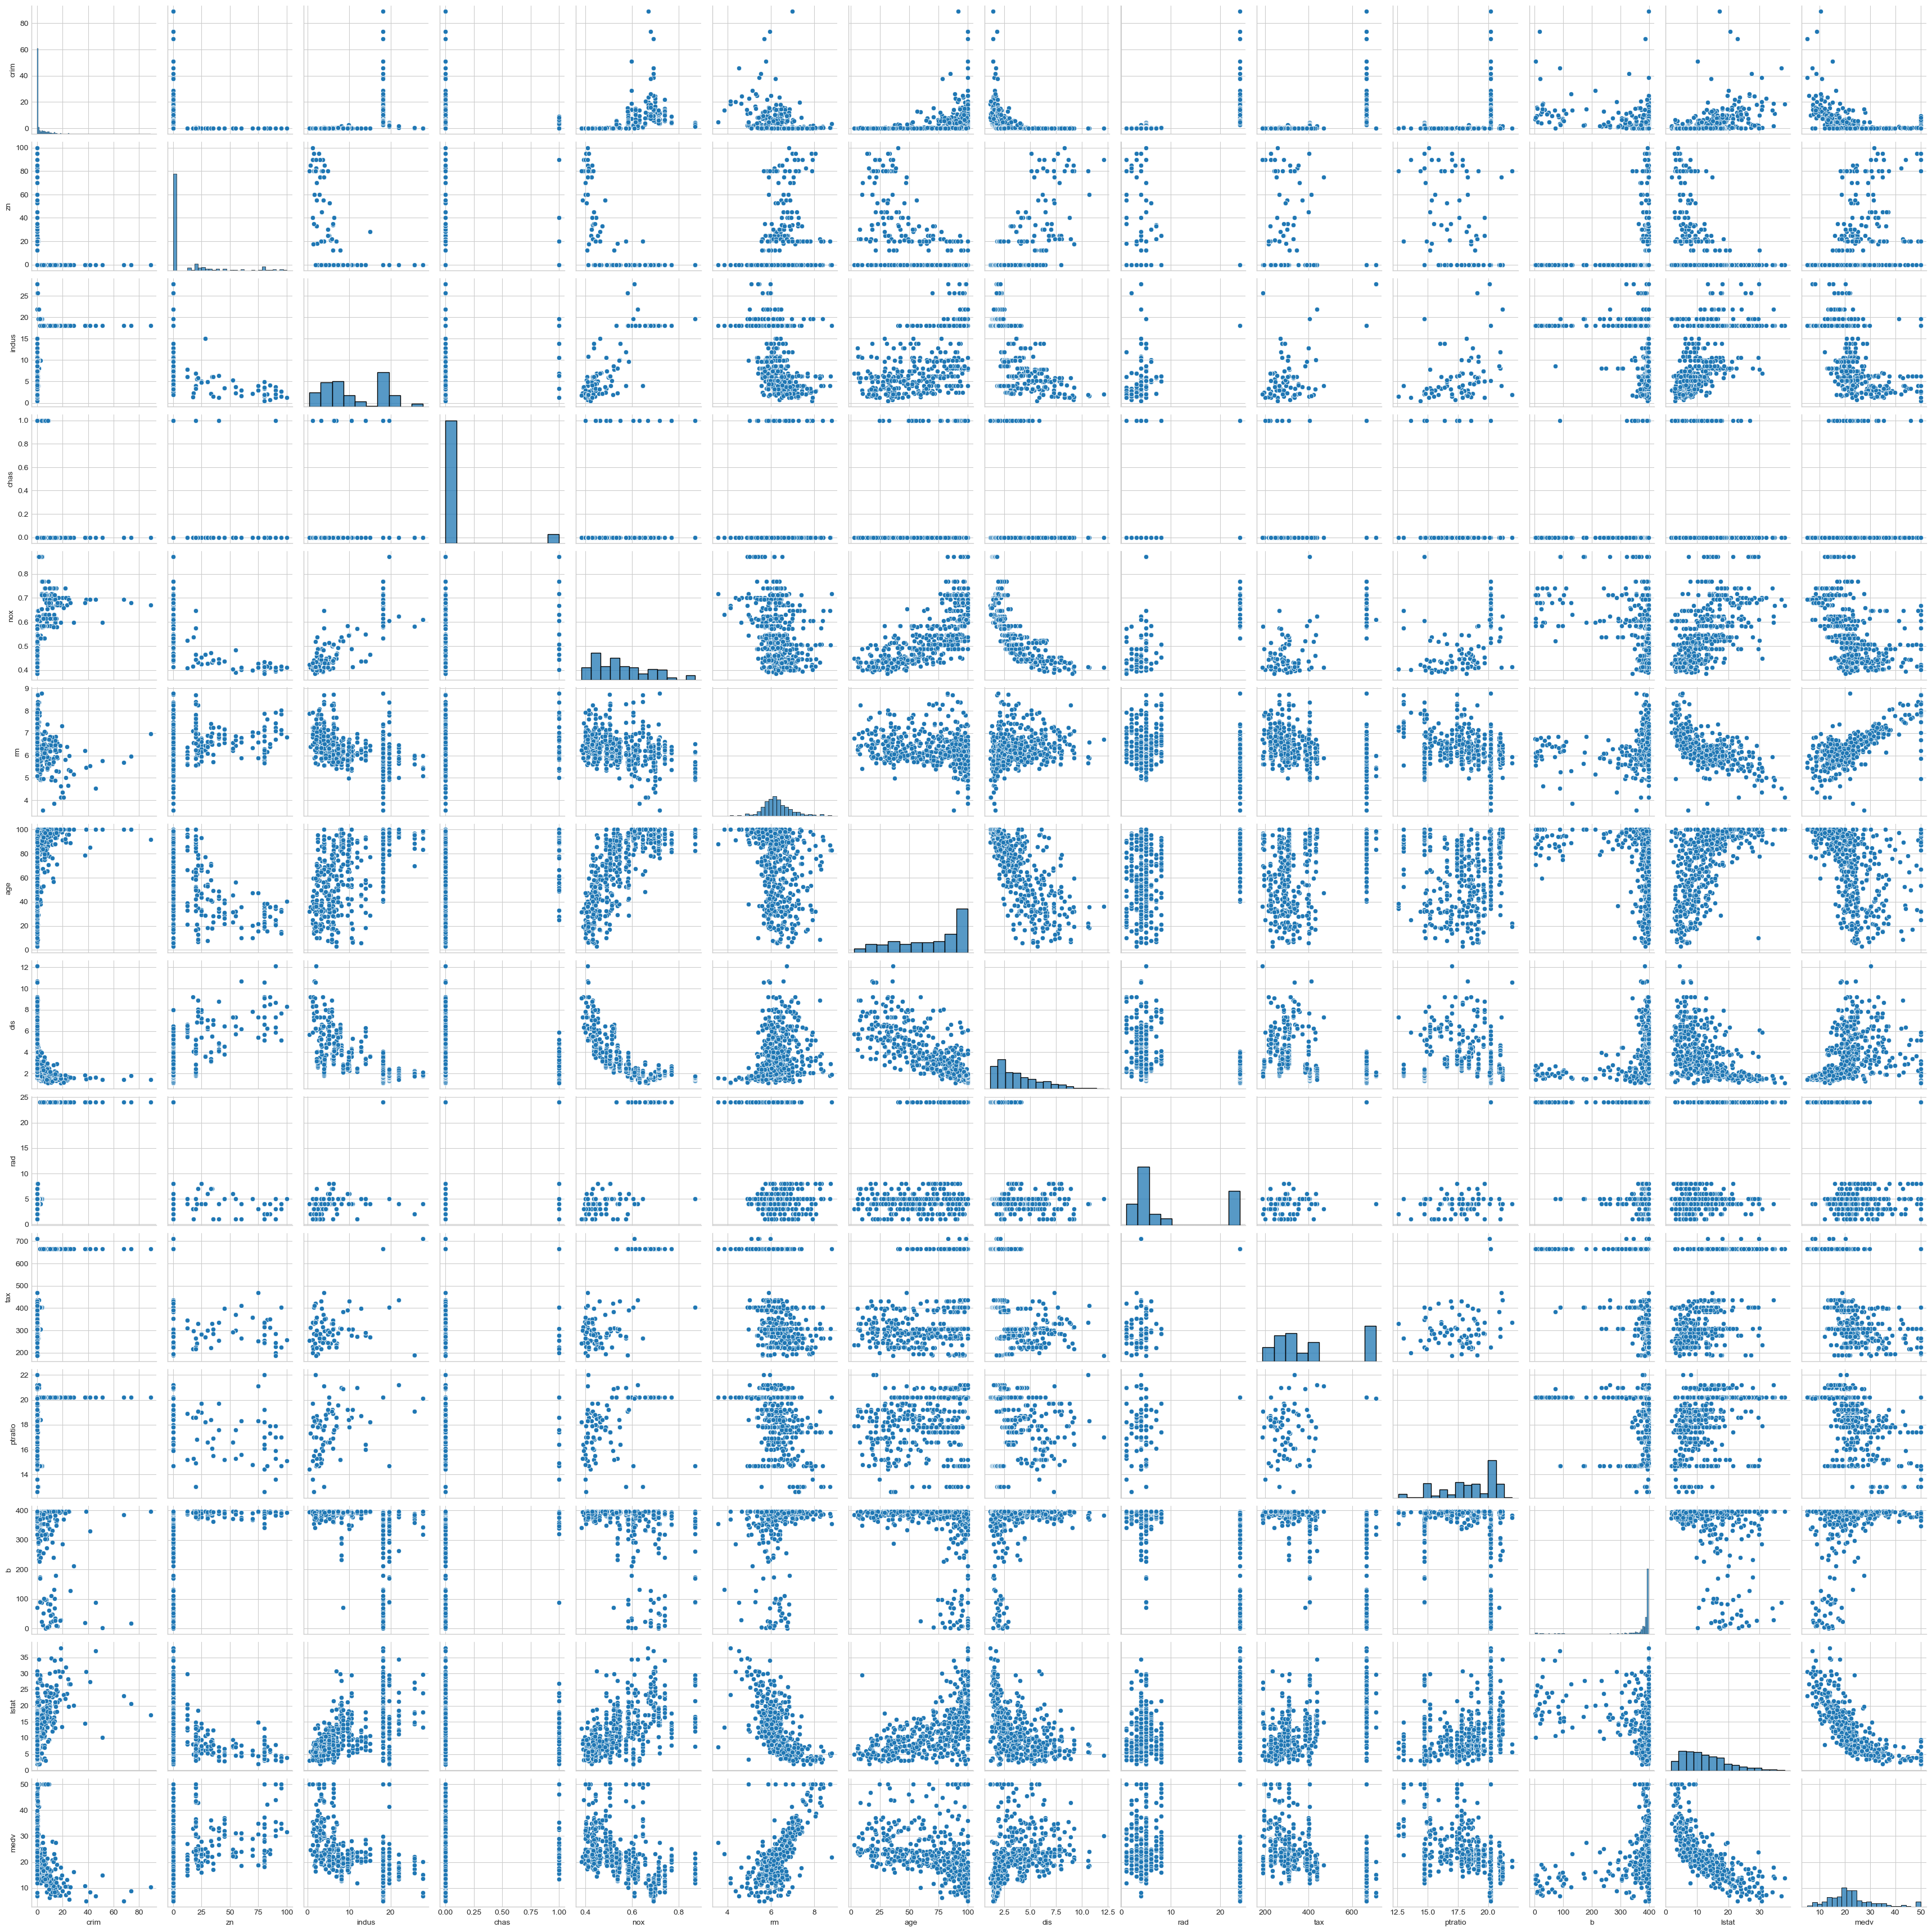

In [38]:
# import seaborn as sns

# sns.pairplot(boston_df)

##### 보스턴 주택 가격에 대한 선형 회귀

In [40]:
model = LinearRegression()

In [56]:
target = boston_df['medv']
boston_df = boston_df.drop('medv', axis=1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(boston_df, target, test_size=0.1)

In [67]:
model.fit(X_train, y_train)

LinearRegression()

In [68]:
model.score(X_test, y_test)

0.7862662655797719

In [69]:
print(f'Score of Trainig : {model.score(X_train, y_train)}')
print(f'Score of Test : {model.score(X_test, y_test)}')

Score of Trainig : 0.7341307454092689
Score of Test : 0.7862662655797719


- 데이터를 두개로 분리하고 모델을 생성 및 검증 하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안도니 경우에는 잘못된 검증이 될 수 있다.
- 이럴 경우 테스트셋을 여러개로 구성하여 교차 검증을 실행해야함
- cross_val_score() 함수는 교차 검증을 수행하여 모델 검증
- 다음 예제에서는 <span style="color:pink">모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용</span>

In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, boston_df, target, cv=10, scoring='neg_mean_squared_error')
print(f'NMSE scores : {scores}')
print(f'NMSE scores mean : {scores.mean()}')
print(f'NMSE scores std : {scores.std()}')

NMSE scores : [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSE scores mean : -34.705255944524815
NMSE scores std : 45.57399920030844


- 회귀모델의 검증을 위한 또 다른 측정 지표인 결정계수(coefficient of determination, $\displaystyle R^2$) 사용

In [72]:
r2_scores = cross_val_score(model, boston_df, target, cv=10, scoring='r2')

print(f'R2 scores : {r2_scores}')
print(f'R2 scores mean : {r2_scores.mean()}')
print(f'R2 scores std : {r2_scores.std()}')

R2 scores : [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean : 0.20252899006055775
R2 scores std : 0.595296016951234


생성된 회귀 모델에 대해서 평가를 위해 Linear Regression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현

- intercept_ : 추정된 상수항
- coef_ : 추정된 가중치 벡터

In [73]:
print('y = '+str(model.intercept_) + ' ')

for i, c in enumerate(model.coef_):
    print(str(c) + ' * x' + str(i))

y = 37.77502794389537 
-0.11892325977421003 * x0
0.05656327845876763 * x1
0.010775265381914817 * x2
2.7872346120633678 * x3
-17.44401350620194 * x4
3.625230472261939 * x5
-0.0039572475572459635 * x6
-1.6202981856077607 * x7
0.28657043269807575 * x8
-0.010535605414262933 * x9
-0.9436825563109169 * x10
0.009411309243630851 * x11
-0.5347845368990902 * x12


In [76]:
# X_train

from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_train, y_train_predict)

print(f'RMSE : {rmse}') # 낮을수록 좋음
print(f'r2 score : {r2}') # 높을수록 좋음

RMSE : 4.7333969262995526
r2 score : 0.7341307454092689


In [77]:
# X_test

y_test_predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print(f'RMSE : {rmse}') # 낮을수록 좋음
print(f'r2 score : {r2}') # 높을수록 좋음

RMSE : 4.254556438106932
r2 score : 0.7862662655797719


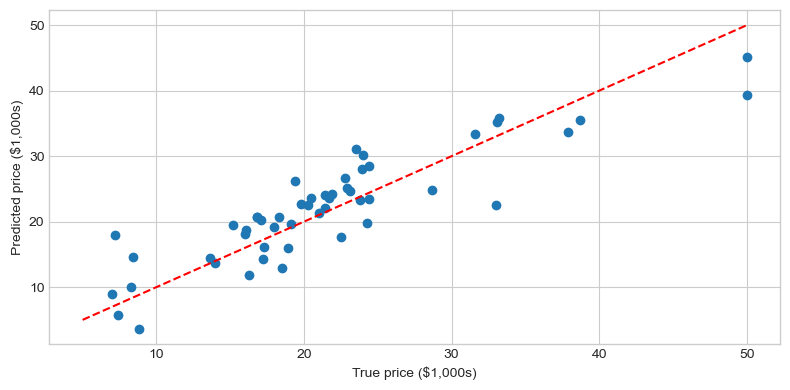

In [79]:
def plot_boston_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([5, 50], [5, 50], '--r')
    plt.xlabel('True price ($1,000s)')
    plt.ylabel('Predicted price ($1,000s)')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

#### 캘리포니아 주택 가격 데이터

In [88]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($10

In [89]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  Target
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23   4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22   3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24   3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25   3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25   3.422

[5 rows x 9 columns]

In [90]:
california_df.describe()

MedInc      HouseAge  ...     Longitude        Target
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.196000
50%        3.534800     29.000000  ...   -118.490000      1.797000
75%        4.743250     37.000000  ...   -118.010000      2.647250
max       15.000100     52.000000  ...   -114.310000      5.000010

[8 rows x 9 columns]

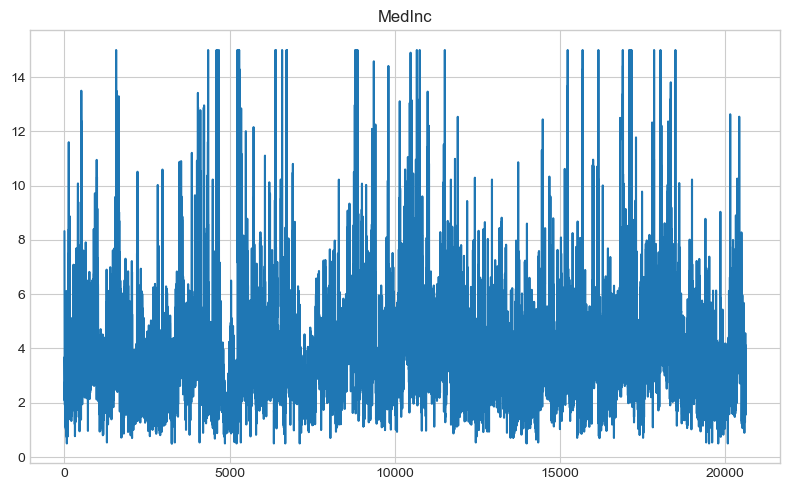

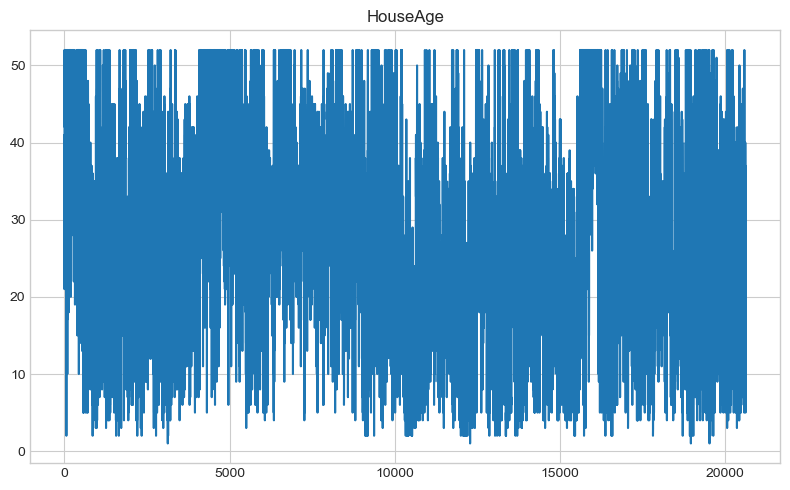

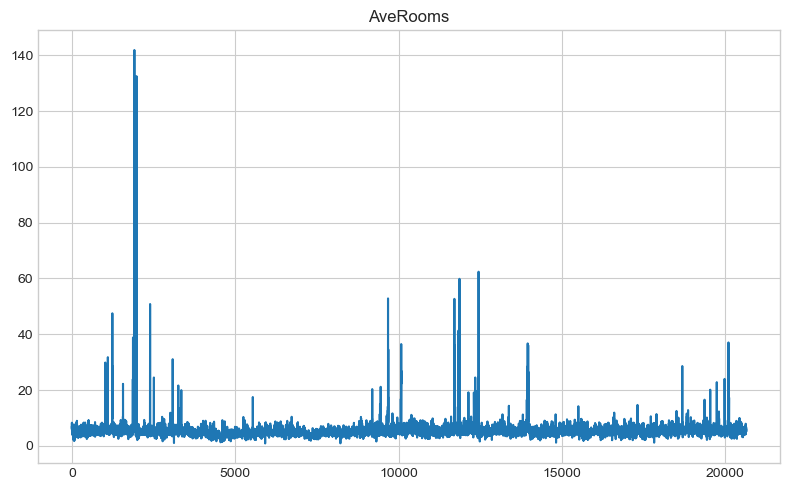

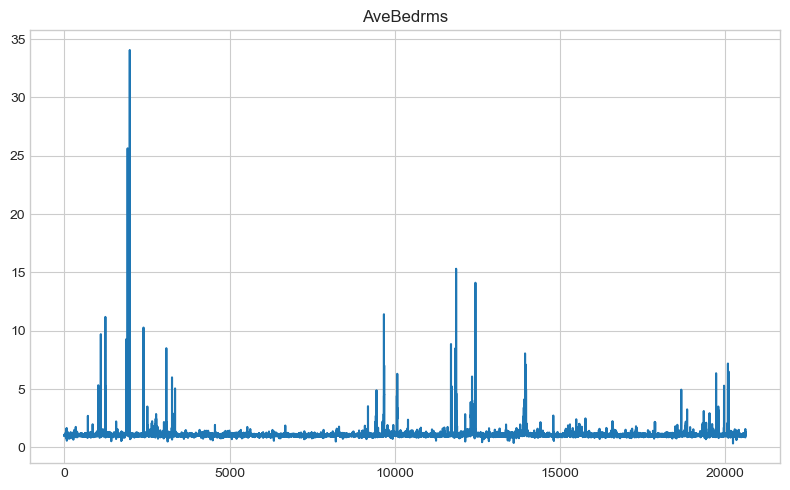

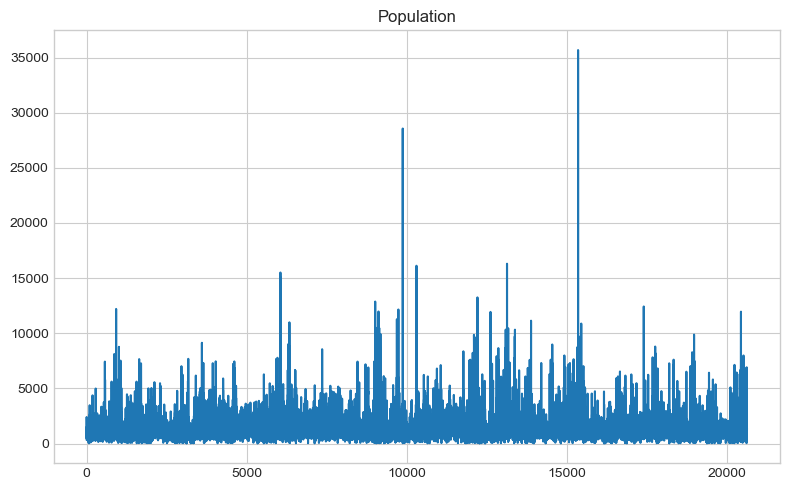

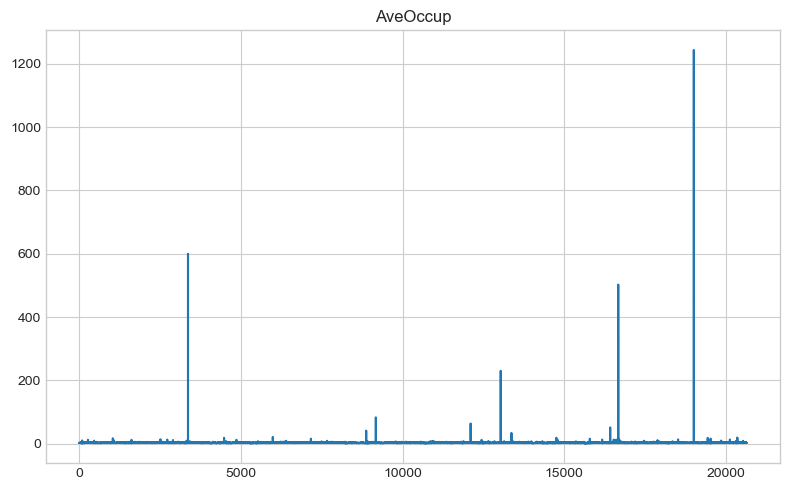

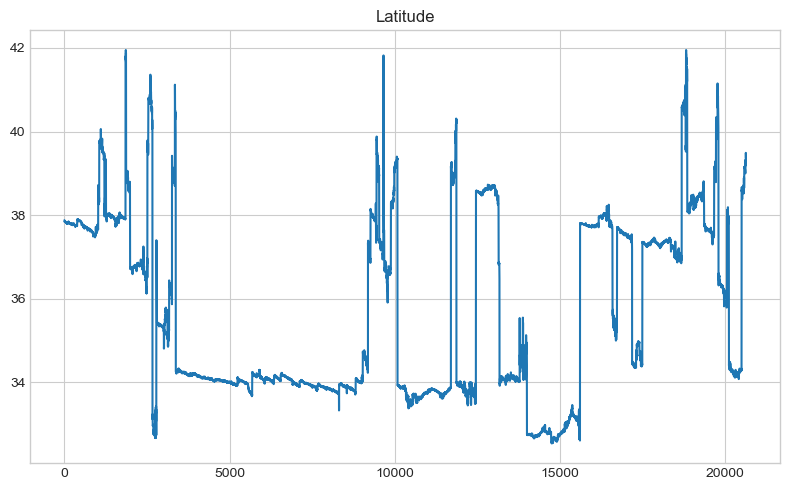

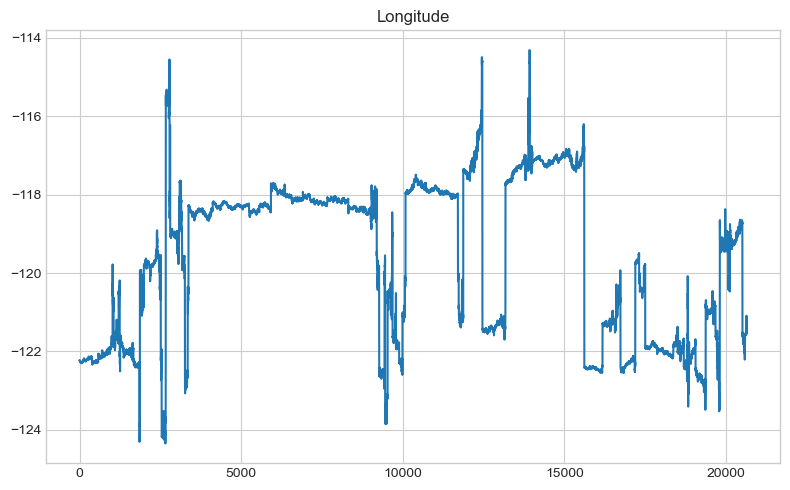

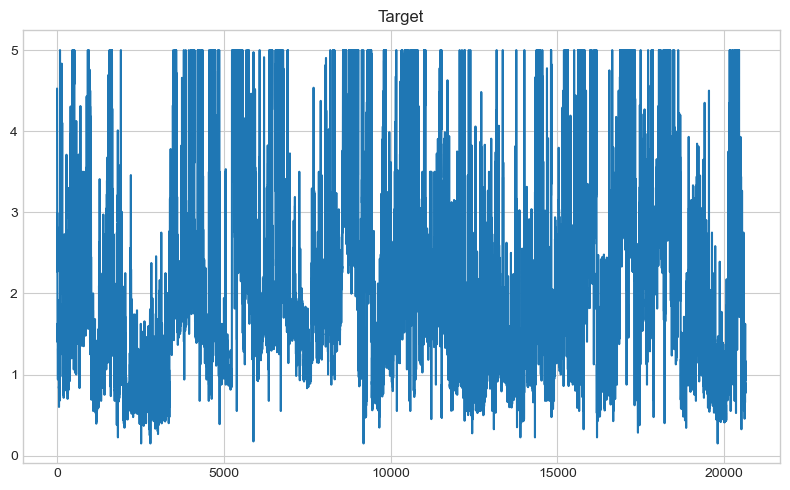

In [91]:
for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8,5))
    plt.plot(california_df[col])
    plt.title(col)
    plt.tight_layout()

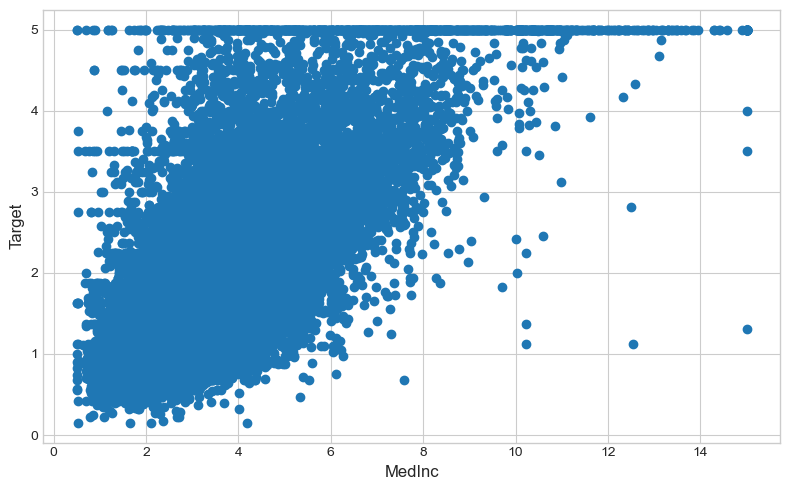

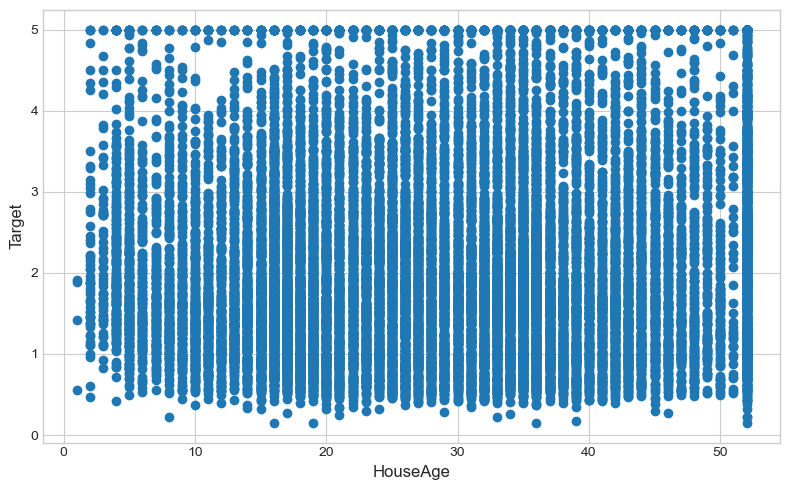

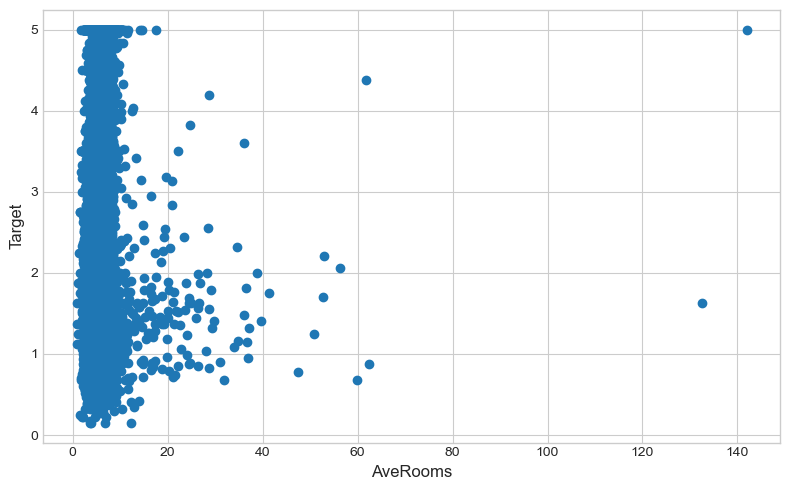

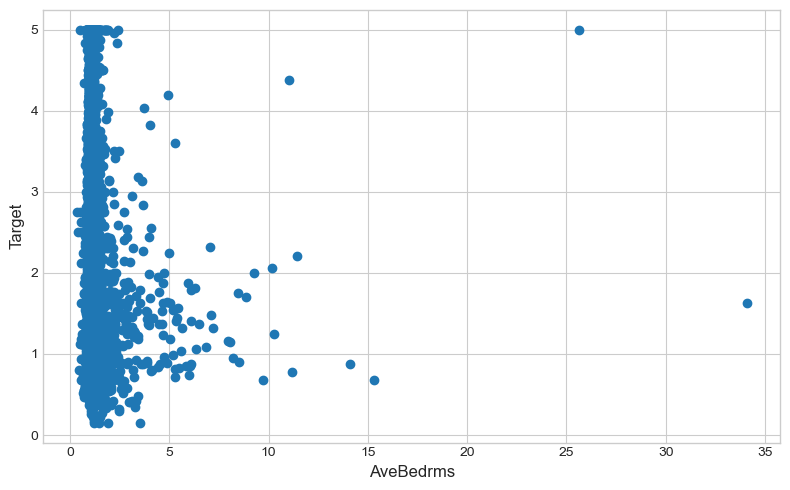

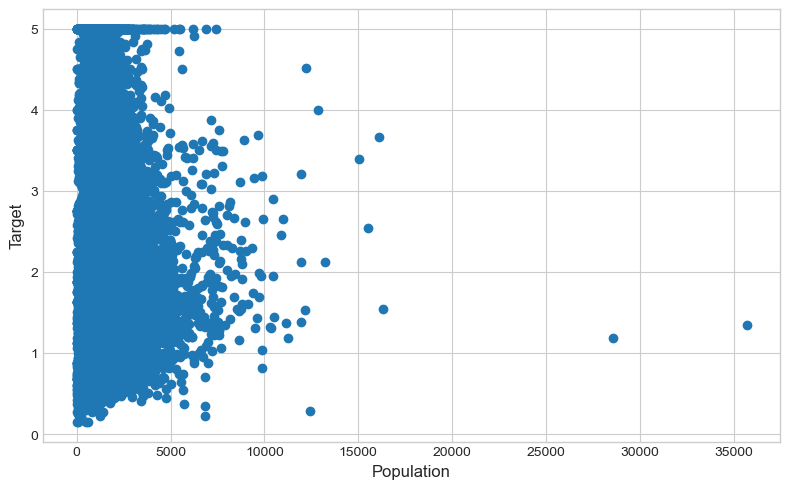

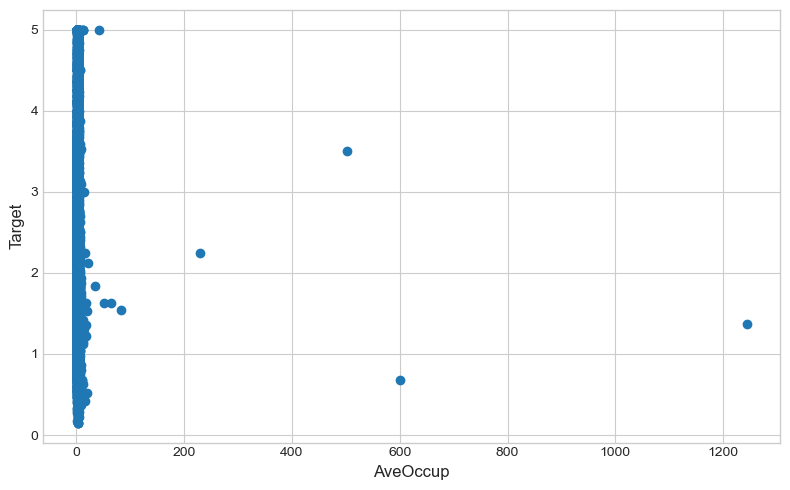

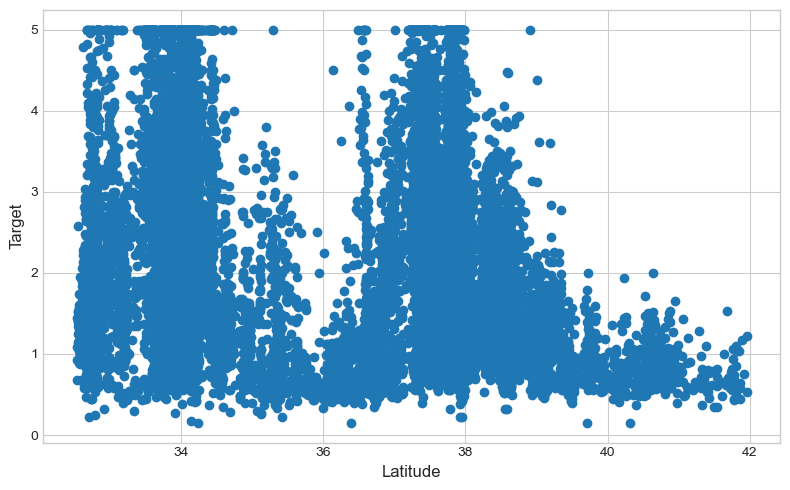

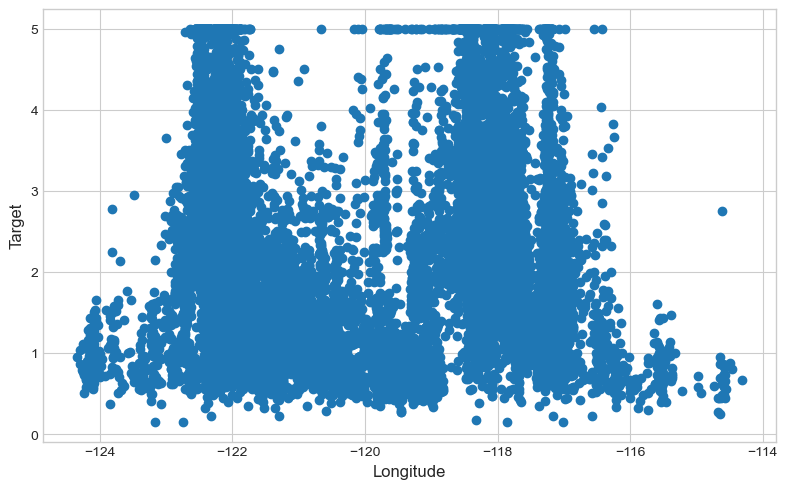

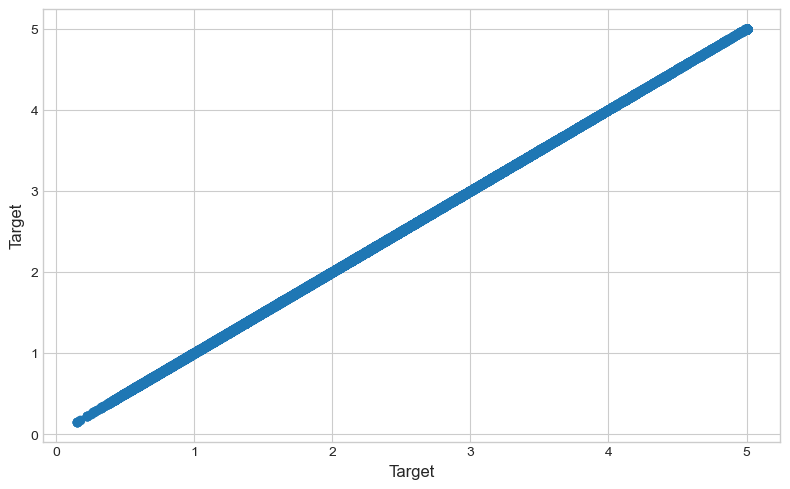

In [92]:
import seaborn as sns

for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8,5))
    plt.scatter(california_df[col], california_df['Target'])
    plt.ylabel('Target', size=12)
    plt.xlabel(col,size=12)
    plt.tight_layout()

c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


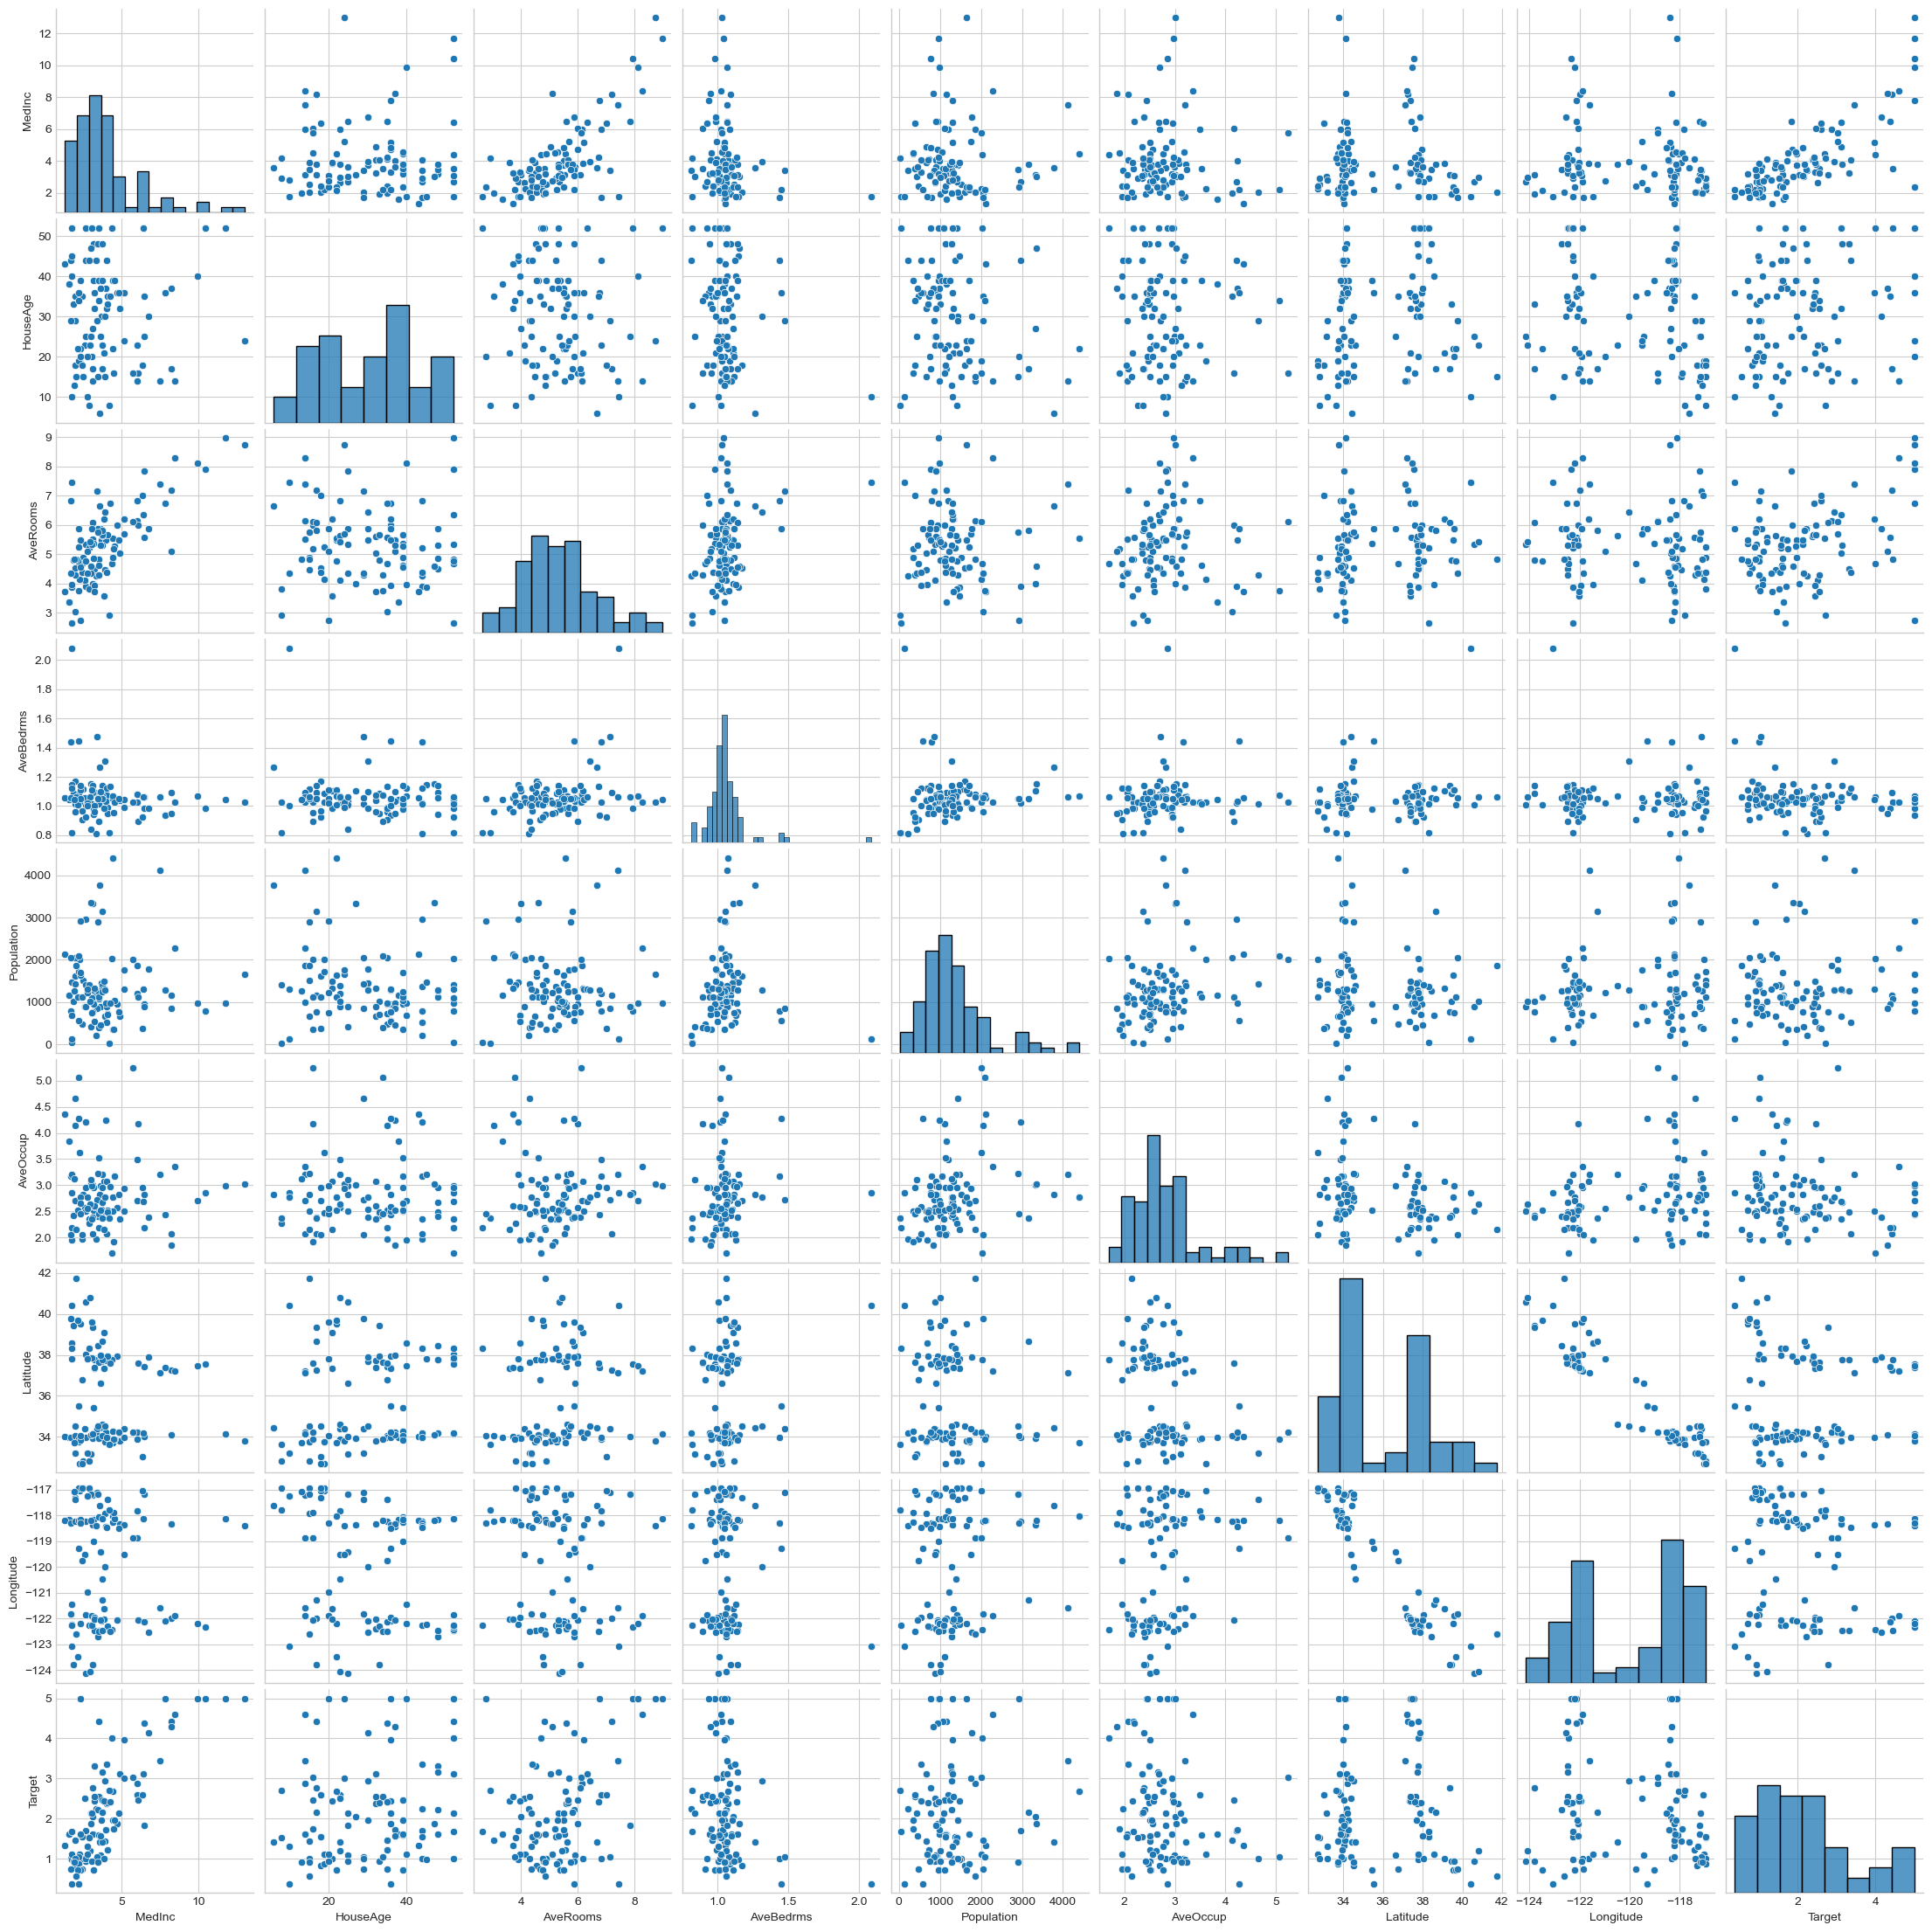

In [96]:
sns.pairplot(california_df.sample(100))

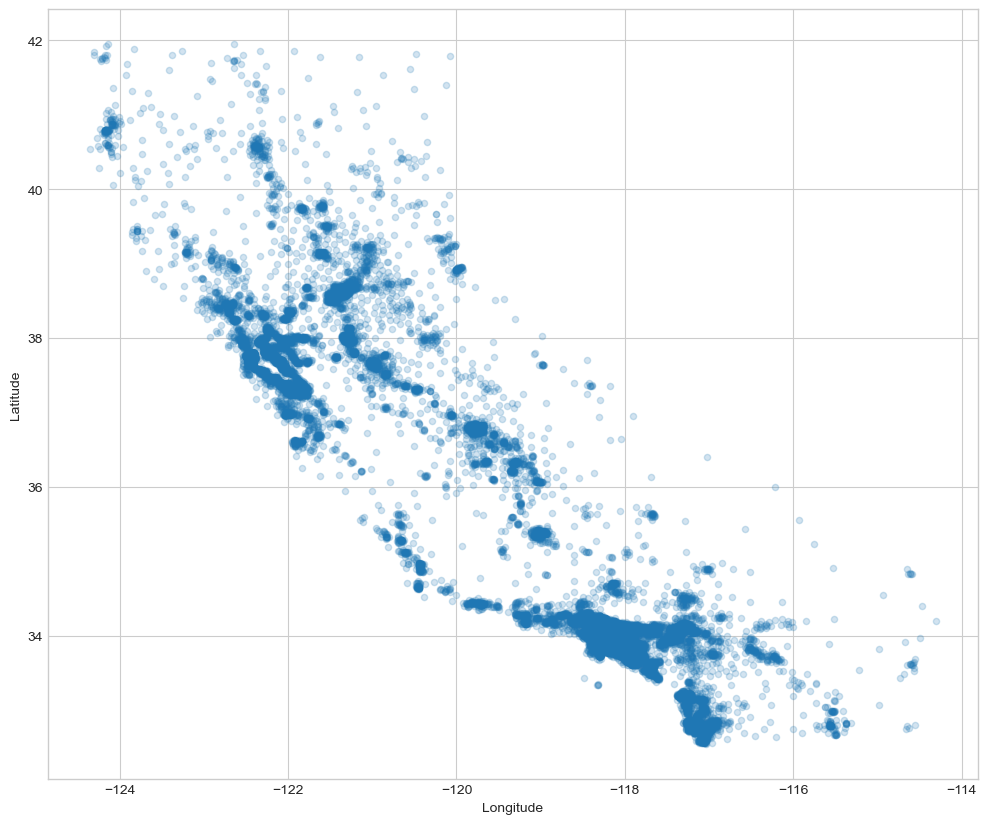

In [99]:
# 해당 데이터에는 위도 경도가 존재함. 따라서, 위치 표시 plot 작성

california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12,10));

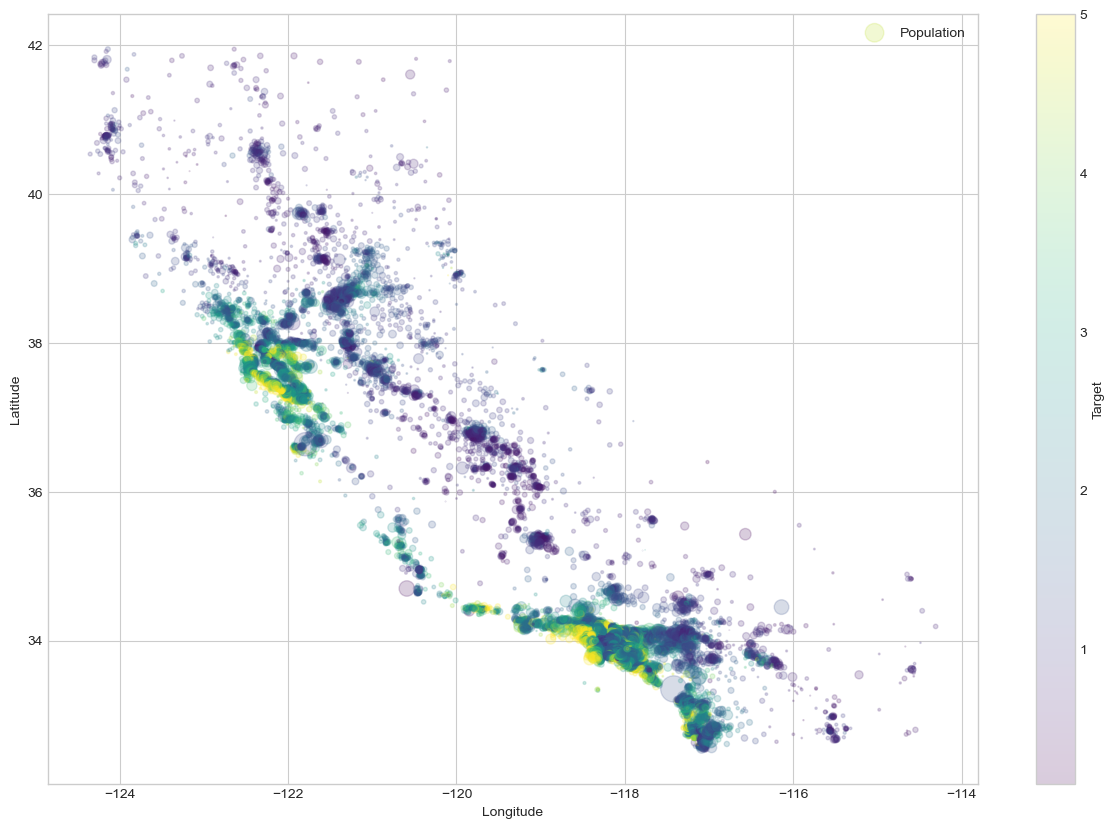

In [100]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, 
                   s=california_df['Population']/100,label='Population', figsize=(15,10),
                   c='Target',cmap=plt.get_cmap('viridis'), colorbar=True);

##### 캘리포니아 주택 가격에 대한 선형 회귀

In [ ]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

model.fit(X_train, y_train)
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test data: {model.score(X_test, y_test)}')

scores = cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')
print(f'NMSE mean : {scores.mean()}')
print(f'NMSE std : {scores.std()}')

r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring='r2')
print(f'R2 Score mean :{r2_scores.mean()}')

Scores of Training Data : 0.6027759655013649
Scores of Test data: 0.6193960312731259
NMSE mean : -0.5509524296956645
NMSE std : 0.19288582953865227
R2 Score mean :0.5110068610523766


In [103]:
print('y =' + str(model.intercept_) + ' ')

for i, c in enumerate(model.coef_):
    print(str(c) + ' * x' + str(i))

y =-36.97273571691161 
0.43085123032354233 * x0
0.009174789178833884 * x1
-0.09773403722962189 * x2
0.5920075806233887 * x3
-4.188432960329502e-06 * x4
-0.0038321443757316823 * x5
-0.4231893661365989 * x6
-0.4356247685043154 * x7


In [104]:
y_train_predict = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_train, y_train_predict)

print(f'RMSE : {rmse}')
print(f'R2 Score : {r2}')

RMSE : 0.7263364675508108
R2 Score : 0.6027759655013649


In [105]:
y_test_predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print(f'RMSE : {rmse}')
print(f'R2 Score : {r2}')

RMSE : 0.7154659892323149
R2 Score : 0.6193960312731259


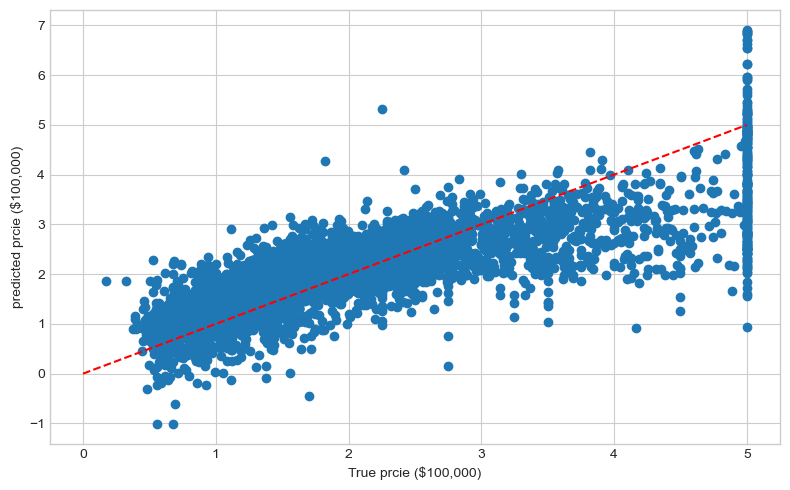

In [106]:
def plot_california_prices(expected, predicted):
    plt.figure(figsize=(8,5))
    plt.scatter(expected, predicted)
    plt.plot([0,5], [0,5], '--r')
    plt.xlabel('True prcie ($100,000)')
    plt.ylabel('predicted prcie ($100,000)')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

##### 릿지 회귀 (Ridge Regression)

- 릿지 회귀는 선형 회귀를 개선한 선형 모델
- 릿지 회귀는 선형 회귀와 비슷하지만, <span style="color:pink">가중치의 절대값을 최대한 작게 만든다는 것이 다름</span>
- 이러한 방법은 각각의 <span style="color:pink">특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)을 거는 것</span>
- 규제를 사용하면 <span style="color:pink">다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨</span>
- 다중공선성 문제는 <span style="color:pink">두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생</span>
- 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 w를 찾음

<div align="center">

$\displaystyle RidgeMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + {a} \sum_{i=1}^{p} {w}_i^2$

</div>

- $a$ : 사용자가 지정하는 매개변수
- $a$ 가 크면 규제의 효과가 커지고, $a$가 작으면 규제의 효과가 작아짐

##### 보스턴 주택 가격에 대한 릿지 회귀

In [108]:
from sklearn.linear_model import Ridge

In [110]:
boston_df

crim    zn  indus  chas    nox  ...  rad  tax  ptratio       b  lstat
0    0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  ...    1  273     21.0  393.45   6.48
505  0.04741   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   7.88

[506 rows x 13 columns]

In [113]:
boston_target = boston_data['medv']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(boston_df, boston_target, test_size=0.2)

In [123]:
model = Ridge(alpha=0.4)
model.fit(X_train, y_train)

Ridge(alpha=0.4)

In [127]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.7312046796138298
Scores of Test Data : 0.7584579096264479


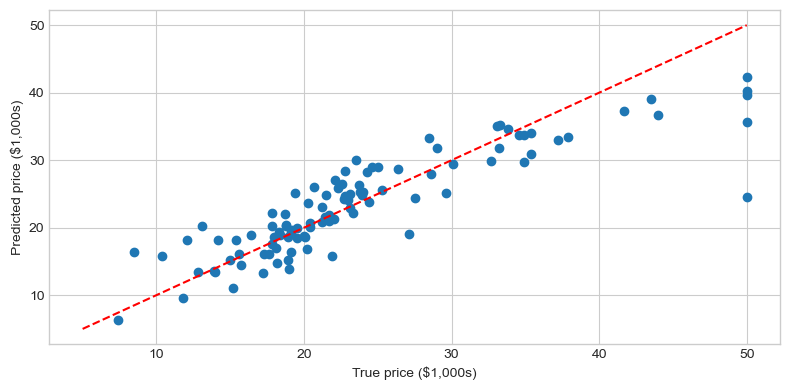

In [129]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

- $Ridge$ $Regression$ 은 가중치에 제약을 두기 때문에 <span style="color:pink"> Linear Regression 보다 훈련 데이터 점수가 낮을 수 있음</span>
- 일반화 성능은 Ridge Regression이 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음
- 일반화 성능에 영향을 주는 매개 변수인 $a$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요함

##### 캘리포니아 주택 가격에 대한 릿지 회귀

In [148]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [149]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [150]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.6036127616950084
Scores of Test Data : 0.6118378284932844


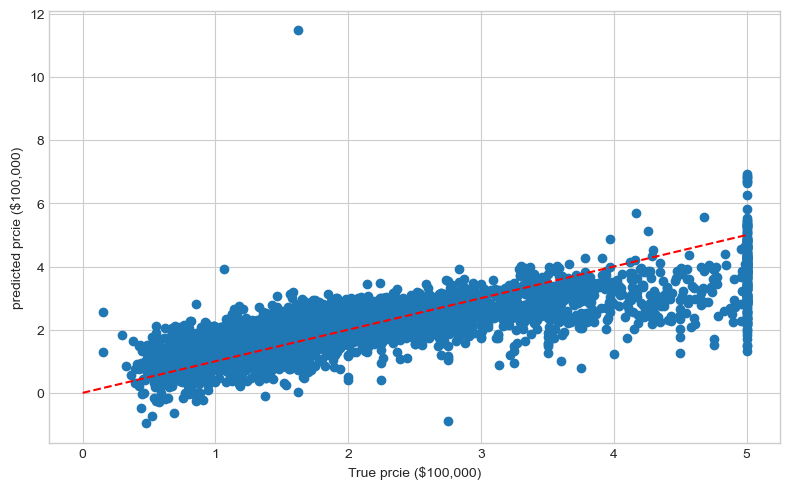

In [151]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

##### 라쏘 회귀 (Lasso Regression)

- 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
- 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용함.
- 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

<div align="center">

$\displaystyle LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + {a} \sum_{i=1}^{p} |{w}_i|$

</div>

- 라쏘 회귀도 매개변수인 $a$값을 통해 규제의 강도 조절이 가능함

##### 보스턴 주택 가격에 대한 라쏘 회귀

In [152]:
from sklearn.linear_model import Lasso

In [174]:
X_train, X_test, y_train, y_test=train_test_split(boston_df, boston_target, test_size=0.2)

In [175]:
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [176]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.724807587958896
Scores of Test Data : 0.7806068701487846


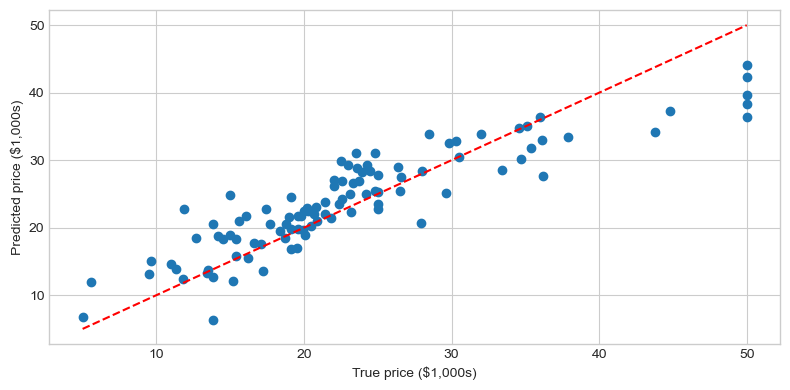

In [177]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

##### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [189]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [190]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [191]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.5450268292439078
Scores of Test Data : 0.5442239761035071


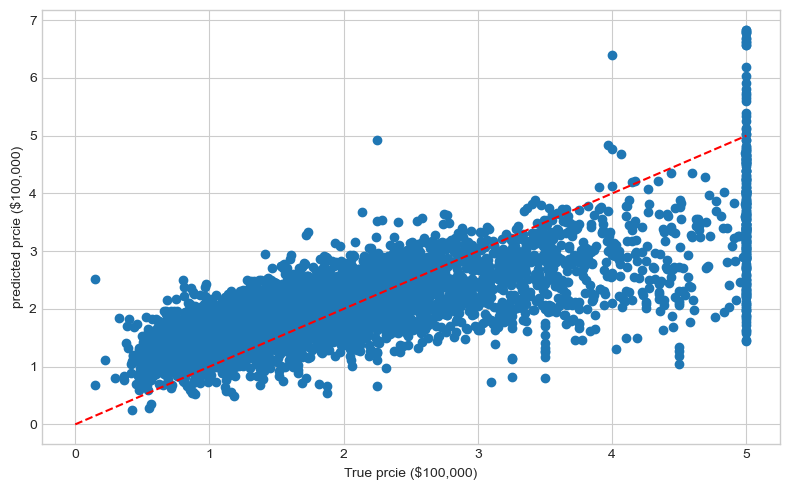

In [192]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

##### 신축망 (Elastic-Net)

- 신축망은 리싲 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
- 두 모델의 장점을 갖고 있기 때문에 좋은 성능을 보임
- 데이터 특성이 많거나 서로 상관관계가 높은 특성이 존재할때 위의 두 모델보다 좋은 성능을 보여줌
- 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

<div align="center">

$\displaystyle ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |{w}_i| + \alpha(1 - \rho) \sum_{i=1}^{p} {w_i}^2$

</div>

- $a$ : 규제의 강도를 조절하는 매개변수
- $\rho$ : 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

##### 보스턴 주택 가격에 대한 신축망

In [193]:
from sklearn.linear_model import ElasticNet

In [195]:
X_train, X_test, y_train, y_test = train_test_split(boston_df, boston_target, test_size=0.2)

In [199]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [200]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.7218196449817971
scores of Test Data : 0.7785222152926302


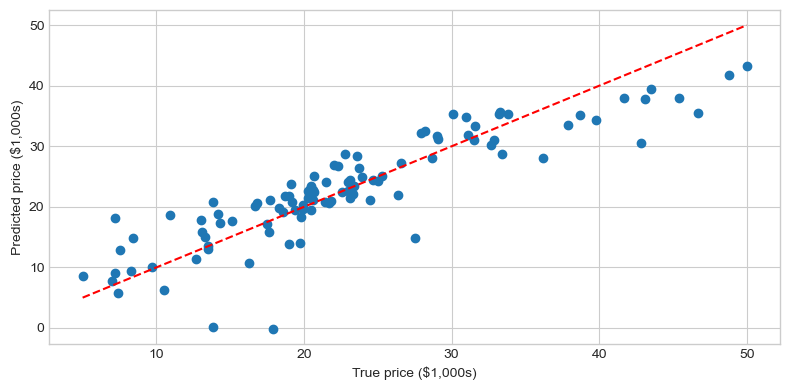

In [201]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

##### 캘리포니아 신축망

In [215]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [216]:
model = ElasticNet(alpha=0.02, l1_ratio=0.4)
model.fit(X_train, y_train)

ElasticNet(alpha=0.02, l1_ratio=0.4)

In [217]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.596984832772416
Scores of Test Data : 0.6182671706662634


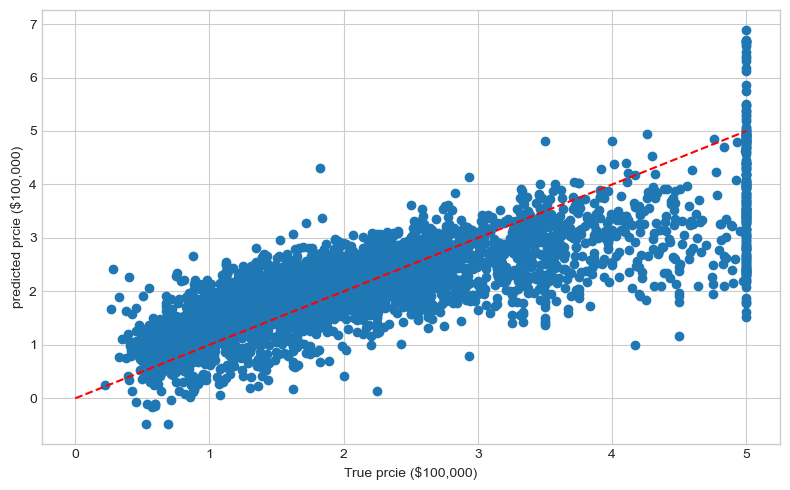

In [218]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

##### 직교 정합 추구 (Orthogonal Matchin Pusuit)

- 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법
- 직교 정합 추구 방법은 다음을 만족하는 파라미터 $w$를 찾는것이 목표

<div align="center">

$\displaystyle \arg \min_{w} \|y - \hat{y}\|_2^2 \quad \displaystyle {subject\ to} \quad \|w\|_0 \leq k$

</div>

- $\|w\|_0$ : 가중치 벡터 $w$dptj 0이 아닌 값의 개수
- 직교 정합 추구 방법은 가중치 벡터 $w$에서 0이 아닌 값이 k개 이하가 되도록 훈련됨
- 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음

##### 보스턴 주택 가격에 대한 직교 정합 추구

In [219]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [230]:
X_train, X_test, y_train, y_test = train_test_split(boston_df, boston_target, test_size=0.1)

In [231]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=10) # 특성 갯수 설정
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=10)

In [232]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.6676739189607412
Scores of Test Data : 0.7455266294105629


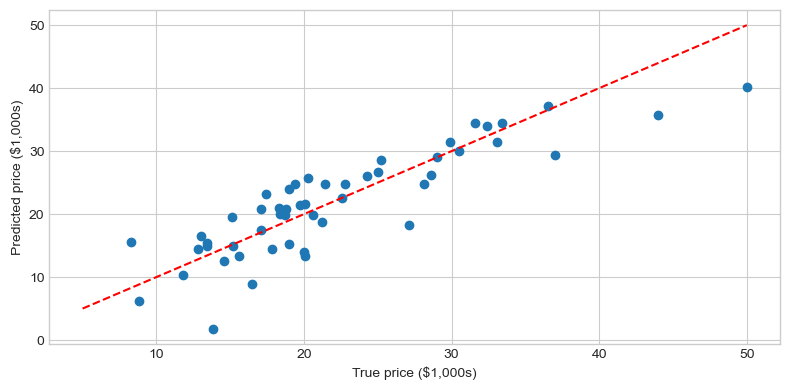

In [233]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

- 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능

<div align="center">

$\displaystyle \arg \min_{w} \|y - \hat{y}\|_2^2 \quad \displaystyle {subject\ to} \quad \|w\|_0 \leq tol$

</div>

- $\|y - \hat{y}\|_2^2$ 는 $\sum_{i=1}^N (y - \hat{y})^2$ 와 같은 의미
- 위의 식을 통해 직교 정합 추구 방법을 $y$와 $\hat{y}$ 사이의 오차 제곱 합을 tol 이하로 하면서 $\|w\|_0$을 최소로 하는 모델로 대체 가능

In [234]:
model = OrthogonalMatchingPursuit(tol=1)
model.fit(X_train, y_train)

c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\utils\_param_validation.py:189: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return func(*args, **kwargs)


OrthogonalMatchingPursuit(tol=1)

In [235]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Socres of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.7345918890278714
Socres of Test Data : 0.7935973357445899


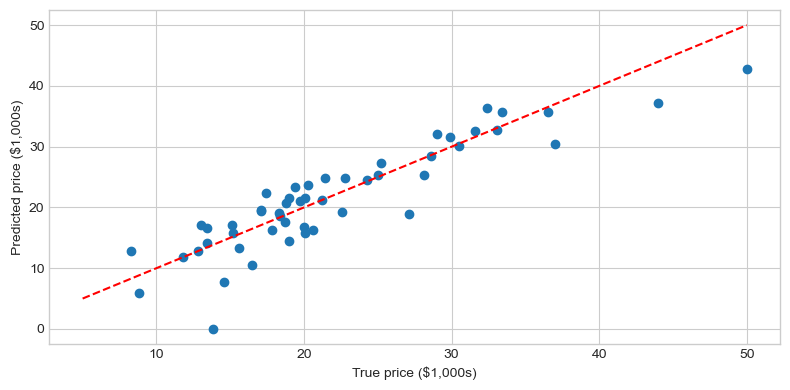

In [236]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

##### 캘리포니아 직교 정합 추구

In [237]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [238]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=5)

In [239]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.518190714954978
Scores of Test Data : 0.5225915370374781


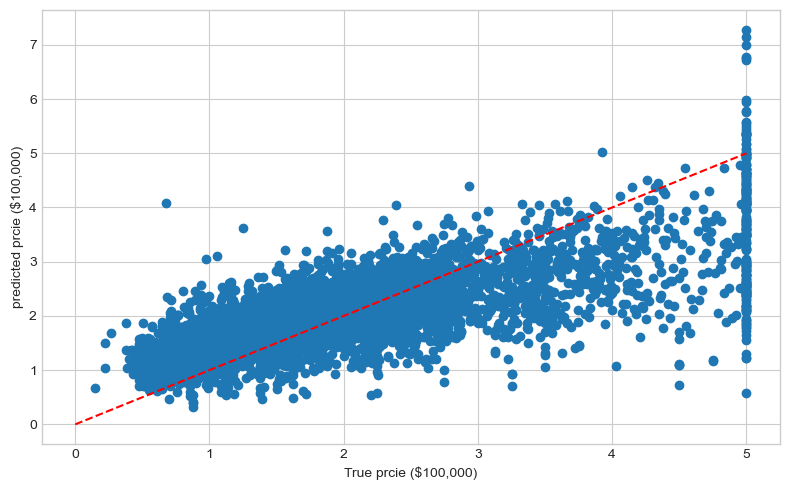

In [240]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

In [241]:
model = OrthogonalMatchingPursuit(tol=1.)
model.fit(X_train, y_train)

c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\utils\_param_validation.py:189: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return func(*args, **kwargs)


OrthogonalMatchingPursuit(tol=1.0)

In [242]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.6053070541962278
Scores of Test Data : 0.6091026048918917


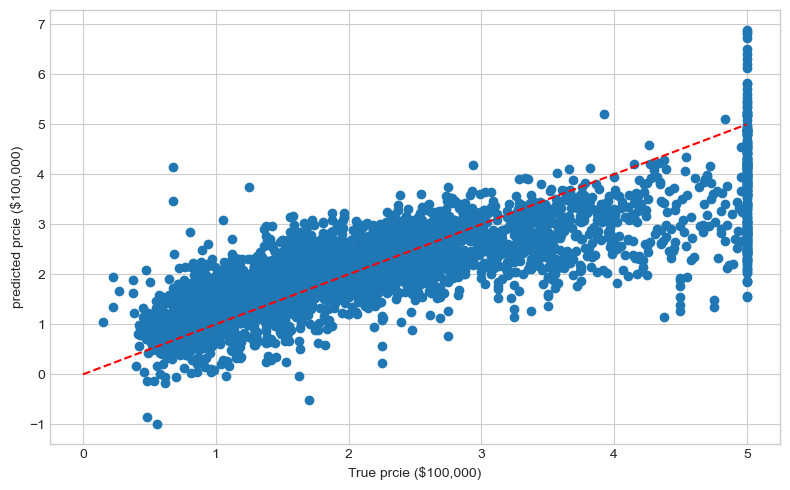

In [243]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

##### 다항 회귀 (PolyNomial Regression)

- 입력 데이터를 비선형 변환 후 사용하는 방법
- 모델 자체는 선형 모델

<div align="center">

$\hat{y} = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4^2 + w_5x_2^2$

</div>

- <span style = "color:pink">차수가 높아질수록 더 복잡한 데이터 학습이 가능하다</span>


In [244]:
# 보스턴 다항 회귀
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [252]:
X_train, X_test, y_train, y_test = train_test_split(boston_df, boston_target, random_state=42)

In [259]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [260]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.9448313975211593
Scores of Test Data : 0.7758378393351685


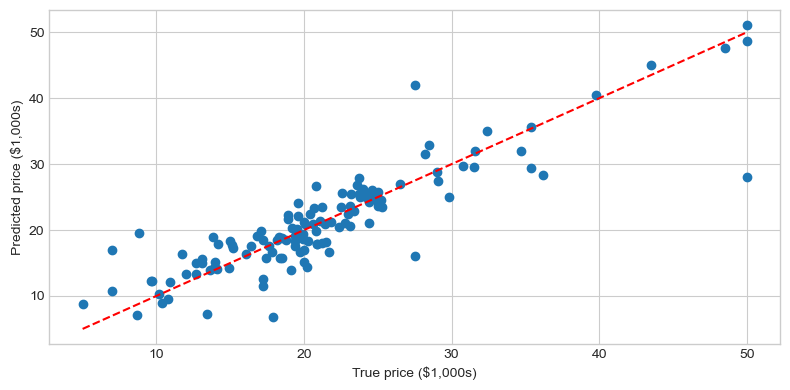

In [261]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

In [262]:
# 캘리포니아 다항회귀

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=42)

In [265]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)

model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [266]:
print(f'Scores of Trainig Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Trainig Data : 0.6829089327528395
Scores of Test Data : 0.6563005880757635


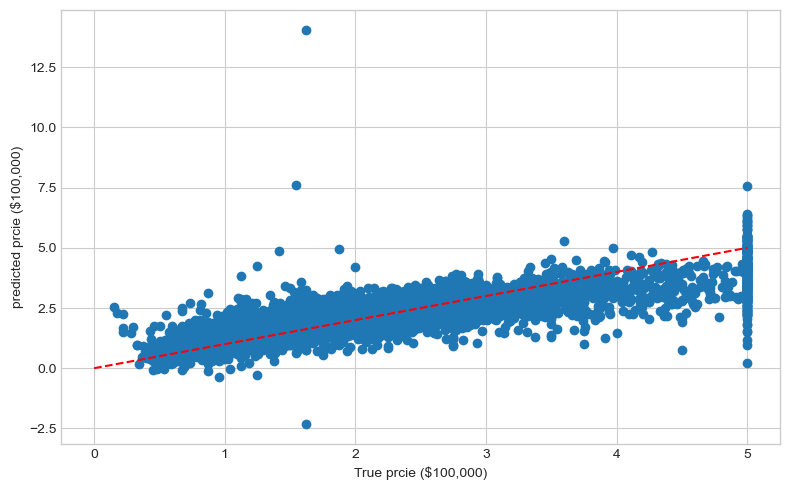

In [267]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)